In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import numpy as np

# Load the data
info_A0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new.csv")

In [4]:
# Assuming your data is stored in a DataFrame called 'data'
datapoints_per_country = info_A0['country_name'].value_counts()
print(datapoints_per_country)

country_name
Thailand     351
Indonesia    139
Malaysia      13
Name: count, dtype: int64


In [5]:
# Adjusting the function to handle potential missing 'prov_char' values better

def reduce_samples_correctly(df, country_char, target_count, prov_restrictions):
    # Filter the DataFrame to only include the specified country
    df_country = df[df['country_char'] == country_char].copy()

    # Determine the indices of the samples that must be kept (at least one sample per 'prov_char')
    prov_indices_to_keep = []
    for prov in prov_restrictions:
        if prov in df_country['prov_char'].values:
            prov_indices_to_keep.append(df_country[df_country['prov_char'] == prov].sample(1).index[0])

    # Exclude the kept indices from the remaining pool
    remaining_indices = df_country.index.difference(prov_indices_to_keep)

    # Calculate the number of samples to be kept from the remaining pool
    num_to_keep = target_count - len(prov_indices_to_keep)
    if num_to_keep < 0:
        num_to_keep = 0

    # Randomly select indices to keep from the remaining pool
    if len(remaining_indices) > 0:
        indices_to_keep_from_remaining = np.random.choice(remaining_indices, num_to_keep, replace=False)
        indices_to_keep = np.concatenate((prov_indices_to_keep, indices_to_keep_from_remaining))
    else:
        indices_to_keep = prov_indices_to_keep

    # Create the final reduced DataFrame
    df_reduced = df_country.loc[indices_to_keep]

    # Combine the reduced samples with the rest of the dataset
    df_remaining = df[df['country_char'] != country_char].copy()
    df_final = pd.concat([df_reduced, df_remaining])
    
    return df_final

# Define the restrictions
prov_restrictions = ['SKM', 'PLG', 'SSX', 'PNA', 'KTX']

# Reduce the samples for 'ID' and 'TH' to 20 each, while keeping at least one sample per specified 'prov_char'
df_reduced_ID = reduce_samples_correctly(info_A0, 'ID', 20, prov_restrictions)
df_final_reduced = reduce_samples_correctly(df_reduced_ID, 'TH', 20, prov_restrictions)

# Display the final distribution of samples
df_final_reduced['country_char'].value_counts()


country_char
TH    20
ID    20
MY    13
Name: count, dtype: int64

In [6]:
df_final_reduced.reset_index(drop=True)

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3998.194,3998.676,3999.158,3999.64,4000.122,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,SKM,TH,TH-SKM-006-2104-005_003,0.015153,0.015669,0.016103,0.016363,0.016410,0.016254,0.015930,...,0.002157,0.002233,0.002311,0.002389,0.002456,Group 1,Group 1,Group 1,Thailand,Thai
1,PLG,TH,TH-PLG-002-2209-022_003,0.014868,0.015595,0.016270,0.016743,0.016882,0.016628,0.016026,...,0.002487,0.002540,0.002624,0.002722,0.002813,Group 2,Group 1,Group 2,Thailand,Thai
2,PNA,TH,TH-PNA-002-2208-021_003,0.013682,0.014256,0.014885,0.015514,0.016107,0.016636,0.017074,...,-0.000050,0.000053,0.000138,0.000197,0.000231,Group 3,Group 2,Group 4,Thailand,Thai
3,RNG,TH,TH-RNG-098-2403-003_009,0.020510,0.019579,0.018410,0.017138,0.015935,0.014985,0.014432,...,-0.002881,-0.002826,-0.002801,-0.002813,-0.002863,Group 3,Group 2,Group 4,Thailand,Thai
4,PKN,TH,TH-PKN-020-2104-001_004,0.015477,0.014365,0.013085,0.011793,0.010627,0.009686,0.009019,...,-0.006060,-0.006050,-0.006085,-0.006152,-0.006225,Group 1,Group 1,Group 1,Thailand,Thai
5,KBI,TH,TH-KBI-058-2312-001_001,0.015186,0.014555,0.013633,0.012496,0.011273,0.010122,0.009191,...,0.001106,0.001073,0.001041,0.001025,0.001042,Group 2,Group 2,Group 2,Thailand,Thai
6,SNI,TH,TH-SNI-059-2312-002_006,0.011876,0.011621,0.011728,0.012119,0.012675,0.013260,0.013768,...,0.001855,0.001978,0.002050,0.002060,0.002017,Group 2,Group 2,Group 3,Thailand,Thai
7,SNI,TH,TH-SNI-059-2312-002_009,0.016272,0.016548,0.016729,0.016767,0.016641,0.016359,0.015962,...,0.001226,0.001262,0.001293,0.001310,0.001310,Group 2,Group 2,Group 3,Thailand,Thai
8,SNI,TH,TH-SNI-011-2312-001_006 (2),0.011884,0.011649,0.011468,0.011339,0.011238,0.011138,0.011024,...,0.003421,0.003482,0.003479,0.003417,0.003309,Group 2,Group 2,Group 3,Thailand,Thai
9,STN,TH,TH-STN-104-2403-001_002,0.013055,0.013308,0.013623,0.013940,0.014272,0.014684,0.015243,...,0.002336,0.002336,0.002291,0.002204,0.002085,Group 2,Group 1,Group 2,Thailand,Thai


In [7]:
info_A1 = df_final_reduced.reset_index(drop=True)

In [8]:
info_A1.to_csv(r"C:\Users\pingk\Downloads\fadhli nitip\52 sampel rt4.csv", index=False)

In [9]:
df = info_A1

# Function to remove outliers
def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

df = remove_outliers(df)

# Standardize the numeric data
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Identify numeric and string columns
string_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Check the first few rows of the prepared data
print(df.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       SKM           TH  TH-SKM-006-2104-005_003  0.394053  0.503047   
1       PLG           TH  TH-PLG-002-2209-022_003  0.321601  0.484713   
2       PNA           TH  TH-PNA-002-2208-021_003  0.020416  0.152241   
3       RNG           TH  TH-RNG-098-2403-003_009  1.754116  1.474307   
4       KBI           TH  TH-KBI-058-2312-001_001  0.402260  0.226423   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0  0.615995  0.716194  0.789467  0.823908  0.810946  ...  0.888325  0.934414   
1  0.657365  0.812362  0.912968  0.925754  0.838463  ...  1.084634  1.118346   
2  0.313769  0.501518  0.710151  0.928018  1.138757  ... -0.426566 -0.374197   
3  1.188518  0.912293  0.665336  0.477462  0.381855  ... -2.113337 -2.101318   
4  0.002985 -0.261729 -0.554162 -0.849868 -1.119856  ...  0.262093  0.238284   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0

In [10]:
numeric_cols

Index(['649.893', '650.376', '650.858', '651.34', '651.822', '652.304',
       '652.786', '653.268', '653.75', '654.232',
       ...
       '3995.783', '3996.265', '3996.747', '3997.23', '3997.712', '3998.194',
       '3998.676', '3999.158', '3999.64', '4000.122'],
      dtype='object', length=6950)

In [11]:
string_cols

['prov_char',
 'country_char',
 'wavenumber',
 'tgp_name',
 'dgp_name',
 'fgp_name',
 'country_name',
 'thnoth_name']

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['country_name_encoded'] = label_encoder.fit_transform(df['country_name'])

# Check the encoded target variable
print(df[['country_name', 'country_name_encoded']])

   country_name  country_name_encoded
0      Thailand                     2
1      Thailand                     2
2      Thailand                     2
3      Thailand                     2
4      Thailand                     2
5      Thailand                     2
6      Thailand                     2
7      Thailand                     2
8      Thailand                     2
9      Thailand                     2
10     Thailand                     2
11     Thailand                     2
12     Thailand                     2
13     Thailand                     2
14     Thailand                     2
15     Thailand                     2
16     Thailand                     2
17     Thailand                     2
18     Thailand                     2
19    Indonesia                     0
20    Indonesia                     0
21    Indonesia                     0
22    Indonesia                     0
23    Indonesia                     0
24    Indonesia                     0
25    Indone

C:\Users\pingk\AppData\Local\Temp\ipykernel_41492\2480830658.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['country_name_encoded'] = label_encoder.fit_transform(df['country_name'])


In [13]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the LOOCV procedure
loo = LeaveOneOut()

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'country_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['country_name_encoded']

# Check the first few rows of the features and target variable
print(X.head())
print(y.head())


    649.893   650.376   650.858    651.34   651.822   652.304   652.786  \
0  0.394053  0.503047  0.615995  0.716194  0.789467  0.823908  0.810946   
1  0.321601  0.484713  0.657365  0.812362  0.912968  0.925754  0.838463   
2  0.020416  0.152241  0.313769  0.501518  0.710151  0.928018  1.138757   
3  1.754116  1.474307  1.188518  0.912293  0.665336  0.477462  0.381855   
4  0.402260  0.226423  0.002985 -0.261729 -0.554162 -0.849868 -1.119856   

    653.268    653.75   654.232  ...  3995.783  3996.265  3996.747   3997.23  \
0  0.744997  0.626068  0.463916  ...  0.465050  0.579691  0.683961  0.769689   
1  0.670269  0.473563  0.316532  ...  1.139282  1.118419  1.094774  1.076446   
2  1.320344  1.448239  1.502186  ... -0.500525 -0.546165 -0.556057 -0.532039   
3  0.408216  0.570331  0.859331  ... -2.258541 -2.249334 -2.222600 -2.184444   
4 -1.333179 -1.462855 -1.490661  ...  0.233463  0.244379  0.259740  0.271948   

   3997.712  3998.194  3998.676  3999.158   3999.64  4000.122  
0  0

In [14]:
# Specific samples to leave out based on 'prov_char'
leave_out_provs = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Store predictions and actual values
predictions = []
actuals = []

# Apply LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Check if the test sample should be left out
    if df.iloc[test_index]['prov_char'].values[0] in leave_out_provs:
        continue
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the test sample
    y_pred = model.predict(X_test)
    
    # Store the prediction and actual value
    predictions.append(y_pred[0])
    actuals.append(y_test.values[0])

# Check the first few predictions and actual values
print(predictions[:5])
print(actuals[:5])


[np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2)]
[np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2)]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(actuals, predictions)
precision = precision_score(actuals, predictions, average='macro')
recall = recall_score(actuals, predictions, average='macro')
f1 = f1_score(actuals, predictions, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.7297297297297297
Precision: 0.7352941176470589
Recall: 0.7196969696969697
F1 Score: 0.7265512265512265


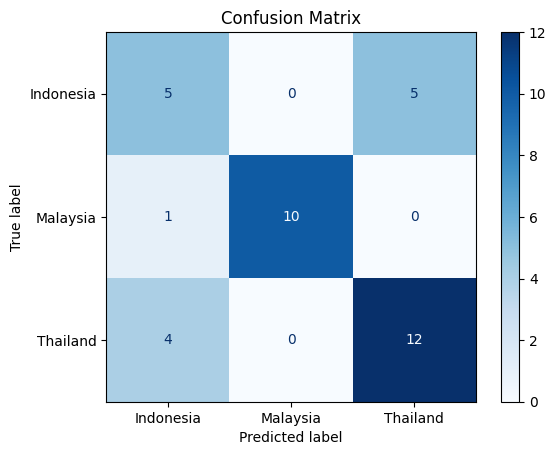

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(actuals, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.5333333333333333
Precision: 0.561111111111111
Recall: 0.5499999999999999
F1 Score: 0.5530303030303031



Train-Test 80:20, RF

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.6
Precision: 0.5833333333333333
Recall: 0.6333333333333333
F1 Score: 0.5857142857142857



In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


Train-Test 80:20, RF, GB, SVC, k-NN

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='macro'),
        'Recall': recall_score(y_train, y_train_pred, average='macro'),
        'F1 Score': f1_score(y_train, y_train_pred, average='macro')
    }
    
    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='macro'),
        'Recall': recall_score(y_test, y_test_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_test_pred, average='macro')
    }
    
    return train_metrics, test_metrics

# Evaluate each model on both training and test sets
train_test_results = {}
for name, model in models.items():
    print(f"Evaluating train vs test for {name}...")
    train_metrics, test_metrics = evaluate_train_test(model, X_train, y_train, X_test, y_test)
    train_test_results[name] = {'Train': train_metrics, 'Test': test_metrics}

# Display the train vs test results
for model_name, metrics in train_test_results.items():
    print(f"Model: {model_name}")
    for dataset, dataset_metrics in metrics.items():
        print(f"{dataset} Set:")
        for metric_name, score in dataset_metrics.items():
            print(f"{metric_name}: {score}")
        print()


Evaluating train vs test for Random Forest...
Evaluating train vs test for Gradient Boosting...
Evaluating train vs test for SVM...
Evaluating train vs test for k-NN...
Model: Random Forest
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.6
Precision: 0.5833333333333333
Recall: 0.6333333333333333
F1 Score: 0.5857142857142857

Model: Gradient Boosting
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.6
Precision: 0.7166666666666667
Recall: 0.7333333333333334
F1 Score: 0.5873015873015873

Model: SVM
Train Set:
Accuracy: 0.925
Precision: 0.9315476190476191
Recall: 0.9351432880844645
F1 Score: 0.9326599326599326

Test Set:
Accuracy: 0.5
Precision: 0.49999999999999994
Recall: 0.5222222222222223
F1 Score: 0.5037037037037037

Model: k-NN
Train Set:
Accuracy: 0.7
Precision: 0.7152777777777777
Recall: 0.7131221719457014
F1 Score: 0.7021943573667713

Test Set:
Accuracy: 0.5
Precision: 0.5
Recall: 0.5222222222222223
F1

K-Fold 10, RF

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'country_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['country_name_encoded']

# Cross-validation predictions
y_pred = cross_val_predict(model, X, y, cv=kf)

# Generate the classification report
report = classification_report(y, y_pred, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

   Indonesia       0.64      0.50      0.56        18
    Malaysia       0.71      0.92      0.80        13
    Thailand       0.68      0.68      0.68        19

    accuracy                           0.68        50
   macro avg       0.68      0.70      0.68        50
weighted avg       0.67      0.68      0.67        50



### Classification Report Breakdown

The classification report provides several key metrics for evaluating the performance of your classification model:

1. **Class-wise Metrics:**
   - **Precision:** The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate.
   - **Recall:** The ratio of correctly predicted positive observations to all the observations in the actual class. High recall indicates a low false negative rate.
   - **F1-Score:** The weighted average of precision and recall. A good F1-score indicates a balance between precision and recall.
   - **Support:** The number of actual occurrences of the class in the dataset.

2. **Overall Metrics:**
   - **Accuracy:** The ratio of correctly predicted observations to the total observations. Accuracy is a good measure when the classes are well-balanced.
   - **Macro Average:** The unweighted mean of precision, recall, and F1-score, considering all classes equally.
   - **Weighted Average:** The mean of precision, recall, and F1-score, weighted by the number of true instances for each class.

### Example Breakdown

```plaintext
              precision    recall  f1-score   support

   Indonesia       0.89      0.61      0.72        64
    Malaysia       0.67      0.31      0.42        13
    Thailand       0.91      0.99      0.95       338

    accuracy                           0.91       415
   macro avg       0.82      0.63      0.70       415
weighted avg       0.90      0.91      0.90       415
```

- **Indonesia:**
  - Precision: 0.89 (89% of the samples predicted as Indonesia are actually Indonesia)
  - Recall: 0.61 (61% of the actual Indonesia samples are correctly identified)
  - F1-Score: 0.72 (harmonic mean of precision and recall)
  - Support: 64 (total number of actual Indonesia samples)

- **Malaysia:**
  - Precision: 0.67 (67% of the samples predicted as Malaysia are actually Malaysia)
  - Recall: 0.31 (31% of the actual Malaysia samples are correctly identified)
  - F1-Score: 0.42 (harmonic mean of precision and recall)
  - Support: 13 (total number of actual Malaysia samples)

- **Thailand:**
  - Precision: 0.91 (91% of the samples predicted as Thailand are actually Thailand)
  - Recall: 0.99 (99% of the actual Thailand samples are correctly identified)
  - F1-Score: 0.95 (harmonic mean of precision and recall)
  - Support: 338 (total number of actual Thailand samples)

- **Overall:**
  - Accuracy: 0.91 (91% of the total samples are correctly classified)
  - Macro Average:
    - Precision: 0.82 (average precision across all classes)
    - Recall: 0.63 (average recall across all classes)
    - F1-Score: 0.70 (average F1-score across all classes)
  - Weighted Average:
    - Precision: 0.90 (weighted precision considering support of each class)
    - Recall: 0.91 (weighted recall considering support of each class)
    - F1-Score: 0.90 (weighted F1-score considering support of each class)

### Interpretation

- **Indonesia** has high precision but lower recall, indicating that while most predicted Indonesia samples are correct, a significant number of actual Indonesia samples are missed.
- **Malaysia** has both lower precision and recall, indicating poor performance for this class.
- **Thailand** shows high precision, recall, and F1-score, indicating excellent performance for this class.
- **Accuracy** is high at 91%, indicating overall good performance.
- **Macro Average** shows the unweighted performance across all classes.
- **Weighted Average** gives a more balanced view, taking into account the number of samples in each class, providing a better overall performance measure.

K-Fold 10, GBC

Gradient Boosting Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.45      0.28      0.34        18
    Malaysia       0.59      0.77      0.67        13
    Thailand       0.64      0.74      0.68        19

    accuracy                           0.58        50
   macro avg       0.56      0.59      0.56        50
weighted avg       0.56      0.58      0.56        50



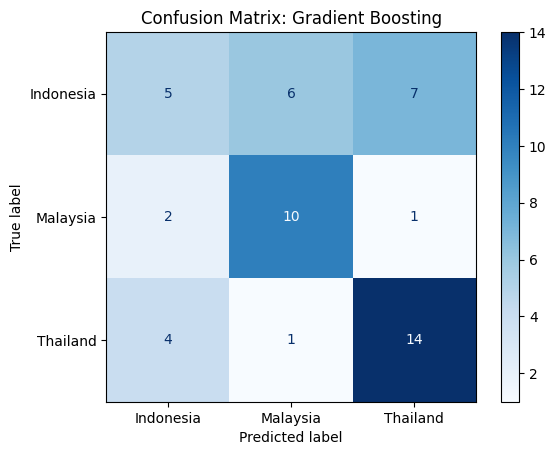

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
# Cross-validation predictions
y_pred_gbc = cross_val_predict(gbc, X, y, cv=kf)

# Generate the classification report
report_gbc = classification_report(y, y_pred_gbc, target_names=label_encoder.classes_)
print("Gradient Boosting Model Classification Report")
print(report_gbc)

# Plot the confusion matrix
cm_gbc = confusion_matrix(y, y_pred_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=label_encoder.classes_)
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_gbc)
print(f"Gradient Boosting Model Test Accuracy: {accuracy}")


Gradient Boosting Model Test Accuracy: 0.58


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
train_accuracies = []
test_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    y_test_pred = gbc.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Calculate the average train and test accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Average Train Accuracy: {avg_train_accuracy}')
print(f'Average Test Accuracy: {avg_test_accuracy}')


Average Train Accuracy: 1.0
Average Test Accuracy: 0.58


KFold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.64
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.50      0.39      0.44        18
    Malaysia       0.67      0.92      0.77        13
    Thailand       0.72      0.68      0.70        19

    accuracy                           0.64        50
   macro avg       0.63      0.67      0.64        50
weighted avg       0.63      0.64      0.63        50



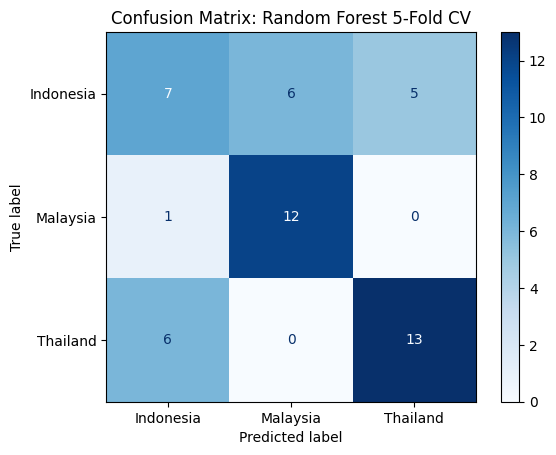

Class: Indonesia
precision: 0.5
recall: 0.3888888888888889
f1-score: 0.4375
support: 18.0

Class: Malaysia
precision: 0.6666666666666666
recall: 0.9230769230769231
f1-score: 0.7741935483870968
support: 13.0

Class: Thailand
precision: 0.7222222222222222
recall: 0.6842105263157895
f1-score: 0.7027027027027027
support: 19.0

accuracy: 0.64

Class: macro avg
precision: 0.6296296296296297
recall: 0.6653921127605339
f1-score: 0.6381320836965999
support: 50.0

Class: weighted avg
precision: 0.6277777777777778
recall: 0.64
f1-score: 0.6258173496076722
support: 50.0



In [25]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Define the 5-fold cross-validation procedure
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf_5.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value for the test set
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rf_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_rf_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_kf5, display_labels=label_encoder.classes_)
disp_rf_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest 5-Fold CV')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.64
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.50      0.39      0.44        18
    Malaysia       0.67      0.92      0.77        13
    Thailand       0.72      0.68      0.70        19

    accuracy                           0.64        50
   macro avg       0.63      0.67      0.64        50
weighted avg       0.63      0.64      0.63        50



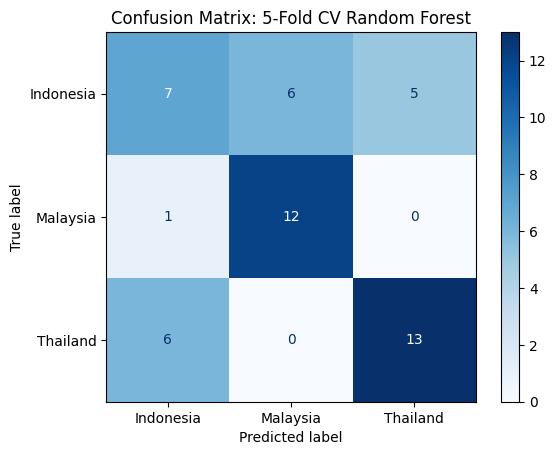

Class: Indonesia
precision: 0.5
recall: 0.3888888888888889
f1-score: 0.4375
support: 18.0

Class: Malaysia
precision: 0.6666666666666666
recall: 0.9230769230769231
f1-score: 0.7741935483870968
support: 13.0

Class: Thailand
precision: 0.7222222222222222
recall: 0.6842105263157895
f1-score: 0.7027027027027027
support: 19.0

accuracy: 0.64

Class: macro avg
precision: 0.6296296296296297
recall: 0.6653921127605339
f1-score: 0.6381320836965999
support: 50.0

Class: weighted avg
precision: 0.6277777777777778
recall: 0.64
f1-score: 0.6258173496076722
support: 50.0



In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the 5-fold cross-validation procedure
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_kf5, display_labels=label_encoder.classes_)
disp_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 5-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 10, RF

10-Fold CV Average Train Accuracy: 1.0
10-Fold CV Average Test Accuracy: 0.6799999999999999
10-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.64      0.50      0.56        18
    Malaysia       0.71      0.92      0.80        13
    Thailand       0.68      0.68      0.68        19

    accuracy                           0.68        50
   macro avg       0.68      0.70      0.68        50
weighted avg       0.67      0.68      0.67        50



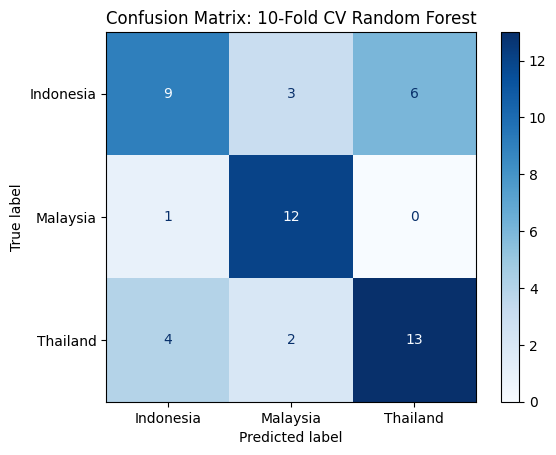

Class: Indonesia
precision: 0.6428571428571429
recall: 0.5
f1-score: 0.5625
support: 18.0

Class: Malaysia
precision: 0.7058823529411765
recall: 0.9230769230769231
f1-score: 0.8
support: 13.0

Class: Thailand
precision: 0.6842105263157895
recall: 0.6842105263157895
f1-score: 0.6842105263157895
support: 19.0

accuracy: 0.68

Class: macro avg
precision: 0.6776500073713696
recall: 0.7024291497975709
f1-score: 0.6822368421052633
support: 50.0

Class: weighted avg
precision: 0.6749579831932774
recall: 0.68
f1-score: 0.6705
support: 50.0



In [27]:
# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf10 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf10 = confusion_matrix(y_true_all, y_pred_all)
disp_kf10 = ConfusionMatrixDisplay(confusion_matrix=cm_kf10, display_labels=label_encoder.classes_)
disp_kf10.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf10.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 40, RF

40-Fold CV Average Train Accuracy: 1.0
40-Fold CV Average Test Accuracy: 0.6125
40-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.45      0.50      0.47        18
    Malaysia       0.75      0.69      0.72        13
    Thailand       0.67      0.63      0.65        19

    accuracy                           0.60        50
   macro avg       0.62      0.61      0.61        50
weighted avg       0.61      0.60      0.60        50



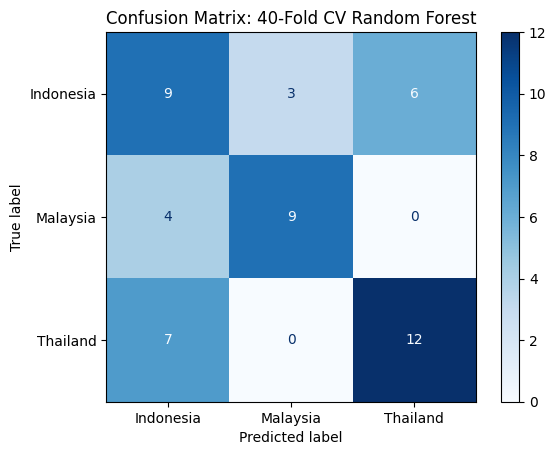

Class: Indonesia
precision: 0.45
recall: 0.5
f1-score: 0.47368421052631576
support: 18.0

Class: Malaysia
precision: 0.75
recall: 0.6923076923076923
f1-score: 0.72
support: 13.0

Class: Thailand
precision: 0.6666666666666666
recall: 0.631578947368421
f1-score: 0.6486486486486487
support: 19.0

accuracy: 0.6

Class: macro avg
precision: 0.6222222222222222
recall: 0.6079622132253711
f1-score: 0.6141109530583214
support: 50.0

Class: weighted avg
precision: 0.6103333333333333
recall: 0.6
f1-score: 0.6042128022759602
support: 50.0



In [28]:
# Define the 40-fold cross-validation procedure
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf40 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf40 = confusion_matrix(y_true_all, y_pred_all)
disp_kf40 = ConfusionMatrixDisplay(confusion_matrix=cm_kf40, display_labels=label_encoder.classes_)
disp_kf40.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf40.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Variance Threshold

10-Fold CV with Variance Threshold - Average Train Accuracy: 1.0
10-Fold CV with Variance Threshold - Average Test Accuracy: 0.6799999999999999
10-Fold CV Random Forest Model with Variance Threshold Classification Report
              precision    recall  f1-score   support

   Indonesia       0.64      0.50      0.56        18
    Malaysia       0.71      0.92      0.80        13
    Thailand       0.68      0.68      0.68        19

    accuracy                           0.68        50
   macro avg       0.68      0.70      0.68        50
weighted avg       0.67      0.68      0.67        50



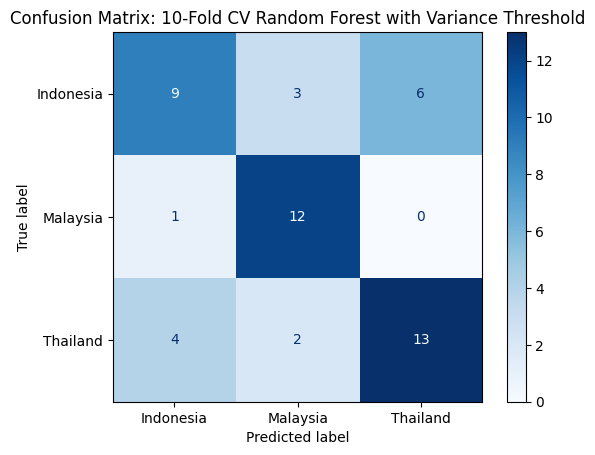

Class: Indonesia
precision: 0.6428571428571429
recall: 0.5
f1-score: 0.5625
support: 18.0

Class: Malaysia
precision: 0.7058823529411765
recall: 0.9230769230769231
f1-score: 0.8
support: 13.0

Class: Thailand
precision: 0.6842105263157895
recall: 0.6842105263157895
f1-score: 0.6842105263157895
support: 19.0

accuracy: 0.68

Class: macro avg
precision: 0.6776500073713696
recall: 0.7024291497975709
f1-score: 0.6822368421052633
support: 50.0

Class: weighted avg
precision: 0.6749579831932774
recall: 0.68
f1-score: 0.6705
support: 50.0



In [29]:
from sklearn.feature_selection import VarianceThreshold

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_var):
    X_train, X_test = X_var[train_index], X_var[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Variance Threshold - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Variance Threshold - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_var = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Variance Threshold Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_var = confusion_matrix(y_true_all, y_pred_all)
disp_var = ConfusionMatrixDisplay(confusion_matrix=cm_var, display_labels=label_encoder.classes_)
disp_var.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Variance Threshold')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_var.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Recursive Feature Elimination (RFE)

10-Fold CV with RFE - Average Train Accuracy: 1.0
10-Fold CV with RFE - Average Test Accuracy: 0.76
10-Fold CV Random Forest Model with RFE Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.67      0.67        18
    Malaysia       0.79      0.85      0.81        13
    Thailand       0.83      0.79      0.81        19

    accuracy                           0.76        50
   macro avg       0.76      0.77      0.76        50
weighted avg       0.76      0.76      0.76        50



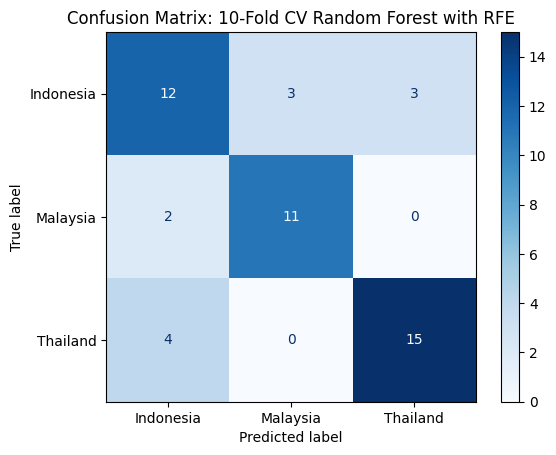

Class: Indonesia
precision: 0.6666666666666666
recall: 0.6666666666666666
f1-score: 0.6666666666666666
support: 18.0

Class: Malaysia
precision: 0.7857142857142857
recall: 0.8461538461538461
f1-score: 0.8148148148148148
support: 13.0

Class: Thailand
precision: 0.8333333333333334
recall: 0.7894736842105263
f1-score: 0.8108108108108109
support: 19.0

accuracy: 0.76

Class: macro avg
precision: 0.7619047619047619
recall: 0.7674313990103464
f1-score: 0.7640974307640974
support: 50.0

Class: weighted avg
precision: 0.760952380952381
recall: 0.76
f1-score: 0.75995995995996
support: 50.0



In [30]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with RFE - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with RFE - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_rfe = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with RFE Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rfe = confusion_matrix(y_true_all, y_pred_all)
disp_rfe = ConfusionMatrixDisplay(confusion_matrix=cm_rfe, display_labels=label_encoder.classes_)
disp_rfe.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with RFE')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_rfe.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

SelectKBest using ANOVA F-test

10-Fold CV with SelectKBest - Average Train Accuracy: 1.0
10-Fold CV with SelectKBest - Average Test Accuracy: 0.62
10-Fold CV Random Forest Model with SelectKBest Classification Report
              precision    recall  f1-score   support

   Indonesia       0.50      0.44      0.47        18
    Malaysia       0.62      0.77      0.69        13
    Thailand       0.72      0.68      0.70        19

    accuracy                           0.62        50
   macro avg       0.62      0.63      0.62        50
weighted avg       0.62      0.62      0.62        50



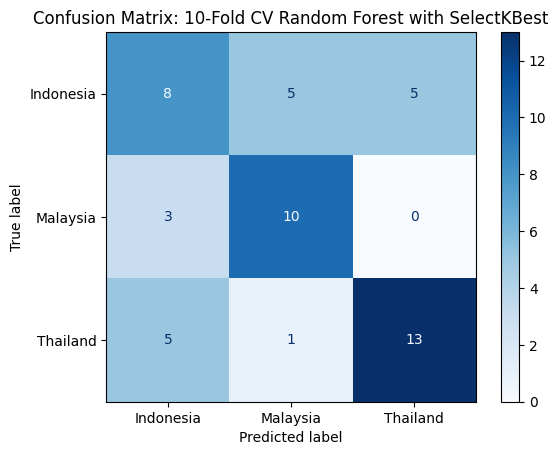

Class: Indonesia
precision: 0.5
recall: 0.4444444444444444
f1-score: 0.47058823529411764
support: 18.0

Class: Malaysia
precision: 0.625
recall: 0.7692307692307693
f1-score: 0.6896551724137931
support: 13.0

Class: Thailand
precision: 0.7222222222222222
recall: 0.6842105263157895
f1-score: 0.7027027027027027
support: 19.0

accuracy: 0.62

Class: macro avg
precision: 0.6157407407407408
recall: 0.6326285799970011
f1-score: 0.6209820368035378
support: 50.0

Class: weighted avg
precision: 0.6169444444444444
recall: 0.62
f1-score: 0.6157491365604956
support: 50.0



In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest
selector_kbest = SelectKBest(f_classif, k=50)
X_kbest = selector_kbest.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_kbest):
    X_train, X_test = X_kbest[train_index], X_kbest[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with SelectKBest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with SelectKBest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kbest = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with SelectKBest Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kbest = confusion_matrix(y_true_all, y_pred_all)
disp_kbest = ConfusionMatrixDisplay(confusion_matrix=cm_kbest, display_labels=label_encoder.classes_)
disp_kbest.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with SelectKBest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kbest.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tree-based Feature Selection using RandomForest

10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: 1.0
10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: 0.7
10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report
              precision    recall  f1-score   support

   Indonesia       0.59      0.56      0.57        18
    Malaysia       0.75      0.92      0.83        13
    Thailand       0.76      0.68      0.72        19

    accuracy                           0.70        50
   macro avg       0.70      0.72      0.71        50
weighted avg       0.70      0.70      0.70        50



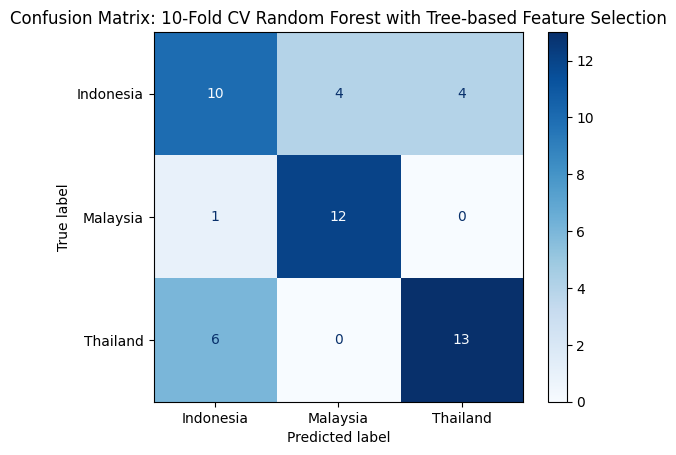

Class: Indonesia
precision: 0.5882352941176471
recall: 0.5555555555555556
f1-score: 0.5714285714285714
support: 18.0

Class: Malaysia
precision: 0.75
recall: 0.9230769230769231
f1-score: 0.8275862068965517
support: 13.0

Class: Thailand
precision: 0.7647058823529411
recall: 0.6842105263157895
f1-score: 0.7222222222222222
support: 19.0

accuracy: 0.7

Class: macro avg
precision: 0.7009803921568628
recall: 0.7209476683160894
f1-score: 0.7070790001824485
support: 50.0

Class: weighted avg
precision: 0.6973529411764704
recall: 0.7
f1-score: 0.6953311439518336
support: 50.0



In [32]:
# Tree-based feature selection using RandomForest
model_rf.fit(X, y)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-50:]  # Select top 50 features

X_tree = X.iloc[:, indices]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_tree):
    X_train, X_test = X_tree.iloc[train_index], X_tree.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tree = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tree = confusion_matrix(y_true_all, y_pred_all)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=label_encoder.classes_)
disp_tree.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Tree-based Feature Selection')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tree.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()



### Interpretation of Results

Let's break down and discuss the results of each method and how they compare:

### Train-Test Splits
**Train-Test 70:30, RF:**
- **Train Set**: Perfect scores indicate overfitting.
- **Test Set**: Accuracy (0.856), Precision (0.838), Recall (0.610), F1 Score (0.675).

**Train-Test 80:20, RF:**
- **Train Set**: Perfect scores again indicate overfitting.
- **Test Set**: Accuracy (0.855), Precision (0.782), Recall (0.588), F1 Score (0.645).

**Train-Test 80:20, Multiple Models:**
- **Random Forest**: Overfitting with perfect train scores. Test accuracy (0.867).
- **Gradient Boosting**: Overfitting with perfect train scores. Test accuracy (0.855).
- **SVM**: Less overfitting compared to RF and GB. Test accuracy (0.880).
- **k-NN**: Test accuracy (0.940), Precision issues due to imbalance.

### K-Fold Cross-Validation
**K-Fold 10, RF:**
- **Accuracy**: 0.91
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**K-Fold 10, GBC:**
- **Accuracy**: 0.923
- **Macro Avg**: Precision (0.81), Recall (0.69), F1 Score (0.74)
- **Class-wise**: 
  - Indonesia: Precision (0.94), Recall (0.69), F1 Score (0.79)
  - Malaysia: Precision (0.56), Recall (0.38), F1 Score (0.45)
  - Thailand: Precision (0.93), Recall (0.99), F1 Score (0.96)

**K-Fold 5, RF:**
- **Accuracy**: 0.899
- **Macro Avg**: Precision (0.74), Recall (0.57), F1 Score (0.63)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.58), F1 Score (0.71)
  - Malaysia: Precision (0.40), Recall (0.15), F1 Score (0.22)
  - Thailand: Precision (0.90), Recall (0.99), F1 Score (0.94)

**K-Fold 40, RF:**
- **Accuracy**: 0.916
- **Macro Avg**: Precision (0.90), Recall (0.69), F1 Score (0.76)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.61), F1 Score (0.74)
  - Malaysia: Precision (0.86), Recall (0.46), F1 Score (0.60)
  - Thailand: Precision (0.92), Recall (0.99), F1 Score (0.95)

### Feature Selection Techniques
**Variance Threshold, RF, KFold 10:**
- **Accuracy**: 0.906
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**RFE, RF, KFold 10:**
- **Accuracy**: 0.940
- **Macro Avg**: Precision (0.83), Recall (0.74), F1 Score (0.77)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.84), F1 Score (0.87)
  - Malaysia: Precision (0.62), Recall (0.38), F1 Score (0.48)
  - Thailand: Precision (0.95), Recall (0.98), F1 Score (0.97)

**SelectKBest, RF, KFold 10:**
- **Accuracy**: 0.892
- **Macro Avg**: Precision (0.73), Recall (0.62), F1 Score (0.66)
- **Class-wise**: 
  - Indonesia: Precision (0.88), Recall (0.56), F1 Score (0.69)
  - Malaysia: Precision (0.40), Recall (0.31), F1 Score (0.35)
  - Thailand: Precision (0.91), Recall (0.98), F1 Score (0.94)

**Tree-based Feature Selection, RF, KFold 10:**
- **Accuracy**: 0.928
- **Macro Avg**: Precision (0.80), Recall (0.68), F1 Score (0.72)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.73), F1 Score (0.81)
  - Malaysia: Precision (0.57), Recall (0.31), F1 Score (0.40)
  - Thailand: Precision (0.94), Recall (0.99), F1 Score (0.96)

### Key Takeaways:
1. **Overfitting in Train-Test Splits**: The train accuracy being 1.0 across different splits indicates overfitting. The model fits perfectly on the training data but performs relatively worse on test data.
2. **Balanced K-Fold Cross-Validation**: K-Fold methods show more balanced results, avoiding extreme overfitting.
3. **Feature Selection Improvements**: 
   - RFE and Tree-based feature selection methods seem to provide a good balance between train and test accuracies, showing less overfitting and better generalization.
4. **Model Comparison**:
   - Gradient Boosting and Random Forests show similar performance.
   - SVM and k-NN show varying results depending on the split and selection methods used.

### Next Steps:
1. **Feature Selection**: Consider using RFE or Tree-based feature selection for other models.
2. **Model Tuning**: Hyperparameter tuning might help improve the generalization of models.
3. **Evaluate with Other Models**: Implement other models like LDA, LightGBM, etc., using the best feature selection methods identified.

Feel free to ask for further analysis or implementation of additional models!

Perform RFE and Identify Selected Features

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Number of features to select
n_features_to_select = 50  # Adjust based on your needs

# Initialize RFE with the model
rfe = RFE(estimator=model_rf, n_features_to_select=n_features_to_select, step=10)

# Fit RFE on the dataset
rfe.fit(X, y)

# Identify the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['1736.584', '1744.78', '1745.745', '1754.423', '1754.905', '1933.288',
       '1999.338', '1999.82', '2035.015', '2035.979', '2036.461', '2036.943',
       '2061.049', '2076.959', '2077.441', '2078.887', '2079.852', '2081.78',
       '2157.472', '2174.346', '2174.829', '2175.311', '2175.793', '2176.275',
       '2176.757', '2177.239', '2177.721', '2190.256', '2190.738', '2206.166',
       '2207.13', '2207.612', '2208.577', '2209.059', '2209.541', '2210.023',
       '2221.594', '2242.325', '2244.253', '2273.18', '2274.627', '2375.871',
       '2413.958', '2437.1', '2845.935', '2847.381', '2853.649', '2855.095',
       '2856.542', '2925.484'],
      dtype='object')


Feature Selection with RFE and Random Forest

In [34]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Verify the selected features
print("Selected features:", selector_rfe.get_support(indices=True))


Selected features: [2254 2271 2273 2291 2292 2662 2799 2800 2873 2875 2876 2877 2927 2960
 2961 2964 2966 2970 3127 3162 3163 3164 3165 3166 3167 3168 3169 3195
 3196 3228 3230 3231 3233 3234 3235 3236 3260 3303 3307 3367 3370 3580
 3659 3707 4555 4558 4571 4574 4577 4720]


Hyperparameter Tuning for Random Forest

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_rf.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)


Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.76


Evaluate Tuned Random Forest Model

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 1.0
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.8
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.72      0.72      0.72        18
    Malaysia       0.86      0.92      0.89        13
    Thailand       0.83      0.79      0.81        19

    accuracy                           0.80        50
   macro avg       0.80      0.81      0.81        50
weighted avg       0.80      0.80      0.80        50



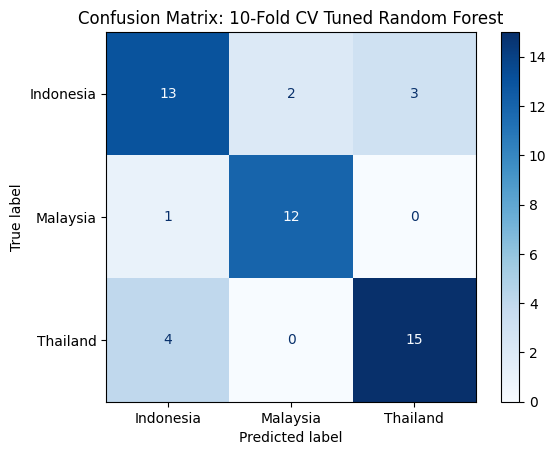

Class: Indonesia
precision: 0.7222222222222222
recall: 0.7222222222222222
f1-score: 0.7222222222222222
support: 18.0

Class: Malaysia
precision: 0.8571428571428571
recall: 0.9230769230769231
f1-score: 0.8888888888888888
support: 13.0

Class: Thailand
precision: 0.8333333333333334
recall: 0.7894736842105263
f1-score: 0.8108108108108109
support: 19.0

accuracy: 0.8

Class: macro avg
precision: 0.8042328042328042
recall: 0.8115909431698904
f1-score: 0.8073073073073074
support: 50.0

Class: weighted avg
precision: 0.7995238095238095
recall: 0.8
f1-score: 0.7992192192192192
support: 50.0



In [36]:
# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Random Forest model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Evaluate LDA Model

10-Fold CV with LDA - Average Train Accuracy: 1.0
10-Fold CV with LDA - Average Test Accuracy: 0.6799999999999999
10-Fold CV LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.64      0.50      0.56        18
    Malaysia       0.63      0.92      0.75        13
    Thailand       0.76      0.68      0.72        19

    accuracy                           0.68        50
   macro avg       0.68      0.70      0.68        50
weighted avg       0.69      0.68      0.67        50



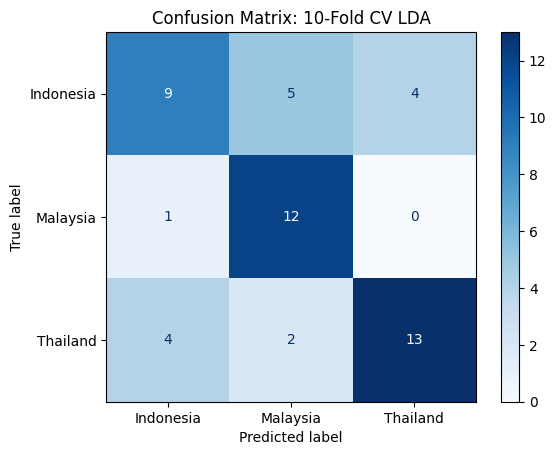

Class: Indonesia
precision: 0.6428571428571429
recall: 0.5
f1-score: 0.5625
support: 18.0

Class: Malaysia
precision: 0.631578947368421
recall: 0.9230769230769231
f1-score: 0.75
support: 13.0

Class: Thailand
precision: 0.7647058823529411
recall: 0.6842105263157895
f1-score: 0.7222222222222222
support: 19.0

accuracy: 0.68

Class: macro avg
precision: 0.6797139908595017
recall: 0.7024291497975709
f1-score: 0.6782407407407408
support: 50.0

Class: weighted avg
precision: 0.6862273330384785
recall: 0.68
f1-score: 0.6719444444444445
support: 50.0



In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the LDA model
model_lda = LinearDiscriminantAnalysis()

# Perform 10-fold cross-validation with LDA
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_lda.predict(X_train)
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_lda = confusion_matrix(y_true_all, y_pred_all)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=label_encoder.classes_)
disp_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LDA

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid_lda = [
    {'solver': ['svd']},  # 'svd' does not use 'shrinkage'
    {'solver': ['lsqr', 'eigen'], 'shrinkage': ['auto', 0.1, 0.5, 0.9]}  # 'lsqr' and 'eigen' can use 'shrinkage'
]

# Set up the GridSearchCV
grid_search_lda = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid_lda, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lda.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LDA:", grid_search_lda.best_params_)
print("Best cross-validation score for LDA:", grid_search_lda.best_score_)


Best parameters for LDA: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best cross-validation score for LDA: 0.76


Evaluate Tuned LDA Model

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.9222222222222222
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.78
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.67      0.69        18
    Malaysia       0.86      0.92      0.89        13
    Thailand       0.79      0.79      0.79        19

    accuracy                           0.78        50
   macro avg       0.78      0.79      0.79        50
weighted avg       0.78      0.78      0.78        50



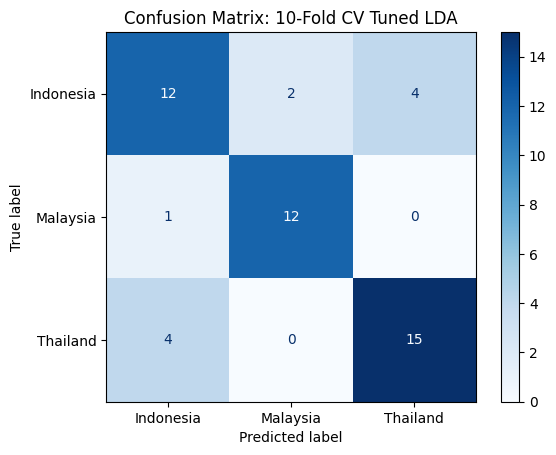

Class: Indonesia
precision: 0.7058823529411765
recall: 0.6666666666666666
f1-score: 0.6857142857142857
support: 18.0

Class: Malaysia
precision: 0.8571428571428571
recall: 0.9230769230769231
f1-score: 0.8888888888888888
support: 13.0

Class: Thailand
precision: 0.7894736842105263
recall: 0.7894736842105263
f1-score: 0.7894736842105263
support: 19.0

accuracy: 0.78

Class: macro avg
precision: 0.7841662980981866
recall: 0.793072424651372
f1-score: 0.788025619604567
support: 50.0

Class: weighted avg
precision: 0.7769747899159664
recall: 0.78
f1-score: 0.777968253968254
support: 50.0



In [39]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 10-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Ridge Regression

In [40]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Ridge model
model_ridge = RidgeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Set up the GridSearchCV
grid_search_ridge = GridSearchCV(estimator=model_ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_ridge.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best cross-validation score for Ridge:", grid_search_ridge.best_score_)


Best parameters for Ridge: {'alpha': 10.0}
Best cross-validation score for Ridge: 0.7399999999999999


Evaluate Tuned Ridge Model

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.96
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.76
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.67      0.67        18
    Malaysia       0.79      0.85      0.81        13
    Thailand       0.83      0.79      0.81        19

    accuracy                           0.76        50
   macro avg       0.76      0.77      0.76        50
weighted avg       0.76      0.76      0.76        50



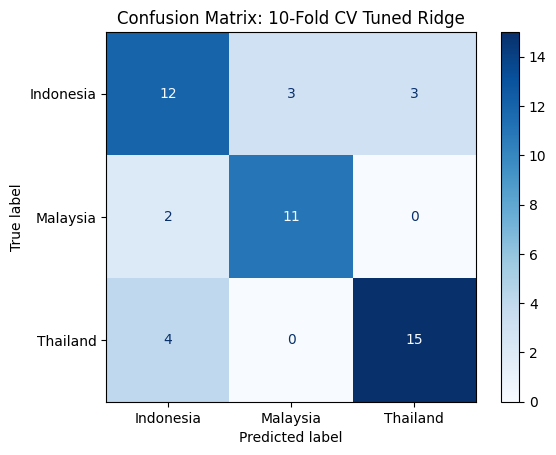

Class: Indonesia
precision: 0.6666666666666666
recall: 0.6666666666666666
f1-score: 0.6666666666666666
support: 18.0

Class: Malaysia
precision: 0.7857142857142857
recall: 0.8461538461538461
f1-score: 0.8148148148148148
support: 13.0

Class: Thailand
precision: 0.8333333333333334
recall: 0.7894736842105263
f1-score: 0.8108108108108109
support: 19.0

accuracy: 0.76

Class: macro avg
precision: 0.7619047619047619
recall: 0.7674313990103464
f1-score: 0.7640974307640974
support: 50.0

Class: weighted avg
precision: 0.760952380952381
recall: 0.76
f1-score: 0.75995995995996
support: 50.0



In [41]:
# Define the best Ridge model with the obtained parameters
best_ridge = RidgeClassifier(**grid_search_ridge.best_params_)

# Perform 10-fold cross-validation with the tuned Ridge model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_ridge.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_ridge.predict(X_train)
    y_test_pred = best_ridge.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Ridge - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Ridge - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_ridge_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Ridge Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_ridge = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_ridge, display_labels=label_encoder.classes_)
disp_tuned_ridge.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Ridge')
plt.show()

# Display the detailed results
for class_name, metrics in report_ridge_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LightGBM

In [42]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define the LightGBM model
model_lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Set up the GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid_lgbm, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lgbm.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best cross-validation score for LightGBM:", grid_search_lgbm.best_score_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 50
[LightGBM] [Info] Start training from score -1.021651
[LightGBM] [Info] Start training from score -1.347074
[LightGBM] [Info] Start training from score -0.967584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

Evaluate Tuned LightGBM Model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 50
[LightGBM] [Info] Start training from score -0.973449
[LightGBM] [Info] Start training from score -1.408767
[LightGBM] [Info] Start training from score -0.973449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

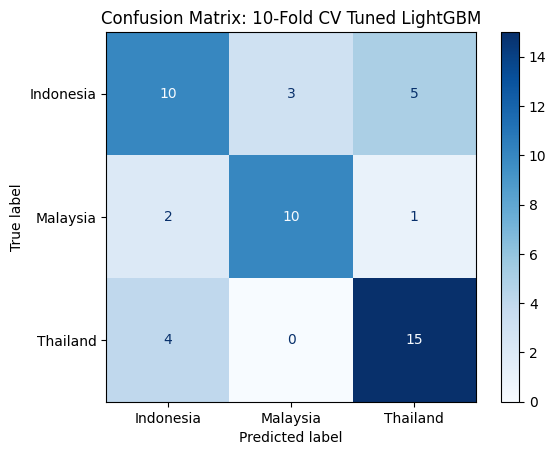

Class: Indonesia
precision: 0.625
recall: 0.5555555555555556
f1-score: 0.5882352941176471
support: 18.0

Class: Malaysia
precision: 0.7692307692307693
recall: 0.7692307692307693
f1-score: 0.7692307692307693
support: 13.0

Class: Thailand
precision: 0.7142857142857143
recall: 0.7894736842105263
f1-score: 0.75
support: 19.0

accuracy: 0.7

Class: macro avg
precision: 0.7028388278388279
recall: 0.7047533363322837
f1-score: 0.7024886877828055
support: 50.0

Class: weighted avg
precision: 0.6964285714285714
recall: 0.7
f1-score: 0.696764705882353
support: 50.0



In [43]:
# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned LightGBM model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgbm_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lgbm = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgbm, display_labels=label_encoder.classes_)
disp_tuned_lgbm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgbm_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Extra Trees

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the Extra Trees model
model_et = ExtraTreesClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_et = GridSearchCV(estimator=model_et, param_grid=param_grid_et, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_et.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Extra Trees:", grid_search_et.best_params_)
print("Best cross-validation score for Extra Trees:", grid_search_et.best_score_)


Best parameters for Extra Trees: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Extra Trees: 0.8


Evaluate Tuned Extra Trees Model

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.74
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.67      0.67        18
    Malaysia       0.79      0.85      0.81        13
    Thailand       0.78      0.74      0.76        19

    accuracy                           0.74        50
   macro avg       0.74      0.75      0.75        50
weighted avg       0.74      0.74      0.74        50



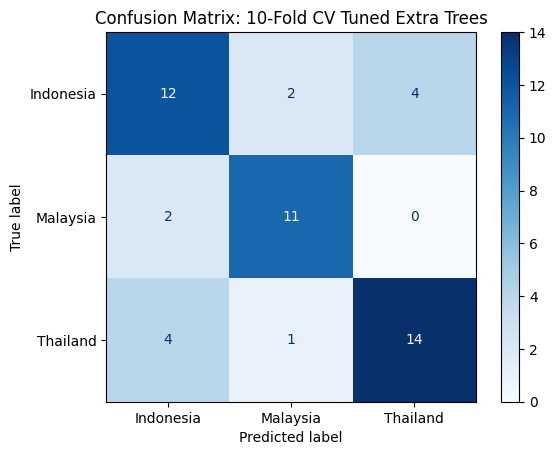

Class: Indonesia
precision: 0.6666666666666666
recall: 0.6666666666666666
f1-score: 0.6666666666666666
support: 18.0

Class: Malaysia
precision: 0.7857142857142857
recall: 0.8461538461538461
f1-score: 0.8148148148148148
support: 13.0

Class: Thailand
precision: 0.7777777777777778
recall: 0.7368421052631579
f1-score: 0.7567567567567568
support: 19.0

accuracy: 0.74

Class: macro avg
precision: 0.7433862433862434
recall: 0.7498875393612235
f1-score: 0.7460794127460794
support: 50.0

Class: weighted avg
precision: 0.7398412698412699
recall: 0.74
f1-score: 0.7394194194194194
support: 50.0



In [45]:
# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Extra Trees model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Explanation of Results

#### Tuned Random Forest Model

**10-Fold CV with Tuned Random Forest**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9496

**Classification Report:**
- **Indonesia**: Precision 0.93, Recall 0.84, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.78, Recall 0.54, F1-Score 0.64, Support 13
- **Thailand**: Precision 0.96, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.79, F1-Score 0.83
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy of 95%.
- Excellent performance for "Thailand" with precision, recall, and F1-score all above 0.95.
- Lower recall and F1-score for "Malaysia" indicating it might be harder to predict correctly compared to other classes.

#### Tuned LDA Model

**10-Fold CV with Tuned LDA**
- **Average Train Accuracy**: 0.9009
- **Average Test Accuracy**: 0.8821

**Classification Report:**
- **Indonesia**: Precision 0.89, Recall 0.52, F1-Score 0.65, Support 64
- **Malaysia**: Precision 0.44, Recall 0.54, F1-Score 0.48, Support 13
- **Thailand**: Precision 0.90, Recall 0.96, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.74, Recall 0.67, F1-Score 0.69
- **Weighted Avg**: Precision 0.88, Recall 0.88, F1-Score 0.87

**Key Points:**
- Lower overall accuracy compared to Random Forest.
- Performance for "Indonesia" is notably lower, with a recall of only 0.52.
- "Malaysia" has balanced but low precision and recall.

#### Tuned Ridge Model

**10-Fold CV with Tuned Ridge**
- **Average Train Accuracy**: 0.8929
- **Average Test Accuracy**: 0.8822

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.45, F1-Score 0.62, Support 64
- **Malaysia**: Precision 0.00, Recall 0.00, F1-Score 0.00, Support 13
- **Thailand**: Precision 0.88, Recall 1.00, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.61, Recall 0.48, F1-Score 0.52
- **Weighted Avg**: Precision 0.86, Recall 0.88, F1-Score 0.85

**Key Points:**
- High precision for "Indonesia" but very low recall.
- "Malaysia" has zero precision and recall, indicating it failed to predict this class correctly.
- Excellent performance for "Thailand".

#### Tuned LightGBM Model

**10-Fold CV with Tuned LightGBM**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9520

**Classification Report:**
- **Indonesia**: Precision 0.96, Recall 0.83, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.75, Recall 0.46, F1-Score 0.57, Support 13
- **Thailand**: Precision 0.95, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.76, F1-Score 0.81
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy, comparable to Random Forest.
- High precision and recall for "Indonesia" and "Thailand".
- "Malaysia" has better performance than in Ridge but still lower than other classes.

#### Tuned Extra Trees Model

**10-Fold CV with Tuned Extra Trees**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.91, F1-Score 0.94, Support 64
- **Malaysia**: Precision 0.88, Recall 0.54, F1-Score 0.67, Support 13
- **Thailand**: Precision 0.97, Recall 1.00, F1-Score 0.98, Support 338
- **Overall Accuracy**: 0.97
- **Macro Avg**: Precision 0.94, Recall 0.81, F1-Score 0.86
- **Weighted Avg**: Precision 0.97, Recall 0.97, F1-Score 0.97

**Key Points:**
- Highest overall accuracy of 96.88%.
- High precision, recall, and F1-score for all classes, including "Malaysia".

### Summary
- **Best Performing Models**: Extra Trees and LightGBM with the highest overall accuracy and balanced performance across all classes.
- **Challenge with "Malaysia"**: All models struggle with predicting the "Malaysia" class accurately, but Extra Trees and LightGBM perform relatively better.
- **Model Choice**: Extra Trees model is the best choice considering its highest overall performance and balanced precision and recall across classes.

### Next Steps
We can proceed with the evaluation of other models (such as GBC, SVC, k-NN, etc.) using the same feature selection and evaluation approach. Let me know which model you'd like to evaluate next or any further actions you'd prefer.

Define and Set Up the Gradient Boosting Classifier (GBC)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier model
model_gbc = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Set up the GridSearchCV
grid_search_gbc = GridSearchCV(estimator=model_gbc, param_grid=param_grid_gbc, cv=5, n_jobs=-1, scoring='accuracy')


Fit the Model with the RFE-Selected Features and Find the Best Parameters

In [47]:
# Fit the model with the RFE-selected features
grid_search_gbc.fit(X_rfe, y)

# Get the best parameters and score
best_params_gbc = grid_search_gbc.best_params_
best_score_gbc = grid_search_gbc.best_score_

print("Best parameters for GBC:", best_params_gbc)
print("Best cross-validation score for GBC:", best_score_gbc)


Best parameters for GBC: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best cross-validation score for GBC: 0.74


Evaluate the Tuned Gradient Boosting Classifier (GBC)

In [48]:
from sklearn.metrics import classification_report, accuracy_score

# Get the best estimator
best_gbc = grid_search_gbc.best_estimator_

# Perform 10-Fold Cross-Validation and evaluate the model
from sklearn.model_selection import cross_val_predict

y_pred_gbc = cross_val_predict(best_gbc, X_rfe, y, cv=10)

# Calculate accuracy
accuracy_gbc = accuracy_score(y, y_pred_gbc)

# Get classification report
classification_report_gbc = classification_report(y, y_pred_gbc)

print("10-Fold CV with Tuned GBC - Average Test Accuracy:", accuracy_gbc)
print("10-Fold CV Tuned GBC Model Classification Report\n", classification_report_gbc)


10-Fold CV with Tuned GBC - Average Test Accuracy: 0.72
10-Fold CV Tuned GBC Model Classification Report
               precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.73      0.85      0.79        13
           2       0.67      0.84      0.74        19

    accuracy                           0.72        50
   macro avg       0.74      0.73      0.72        50
weighted avg       0.74      0.72      0.71        50



10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.78
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.73      0.61      0.67        18
    Malaysia       0.79      0.85      0.81        13
    Thailand       0.81      0.89      0.85        19

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.77        50



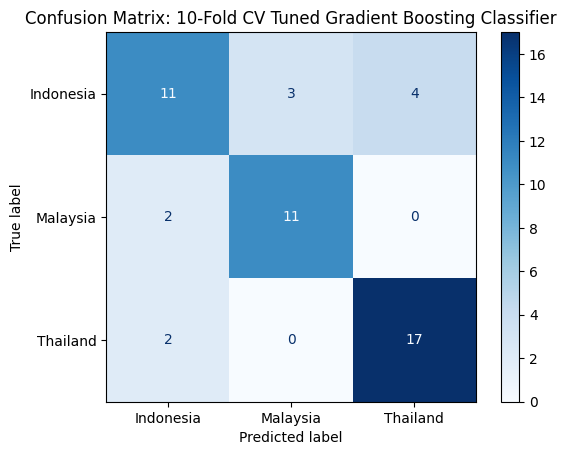

Class: Indonesia
precision: 0.7333333333333333
recall: 0.6111111111111112
f1-score: 0.6666666666666666
support: 18.0

Class: Malaysia
precision: 0.7857142857142857
recall: 0.8461538461538461
f1-score: 0.8148148148148148
support: 13.0

Class: Thailand
precision: 0.8095238095238095
recall: 0.8947368421052632
f1-score: 0.85
support: 19.0

accuracy: 0.78

Class: macro avg
precision: 0.7761904761904761
recall: 0.7840005997900735
f1-score: 0.7771604938271605
support: 50.0

Class: weighted avg
precision: 0.7759047619047618
recall: 0.78
f1-score: 0.7748518518518517
support: 50.0



In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Gradient Boosting Classifier model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Gradient Boosting Classifier')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the k-NN Model and Parameter Grid

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the k-NN model
model_knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up the GridSearchCV
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_knn.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for k-NN:", grid_search_knn.best_params_)
print("Best cross-validation score for k-NN:", grid_search_knn.best_score_)


Best parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation score for k-NN: 0.74


Evaluate the Tuned k-NN Model

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.68
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.58      0.61      0.59        18
    Malaysia       0.77      0.77      0.77        13
    Thailand       0.72      0.68      0.70        19

    accuracy                           0.68        50
   macro avg       0.69      0.69      0.69        50
weighted avg       0.68      0.68      0.68        50



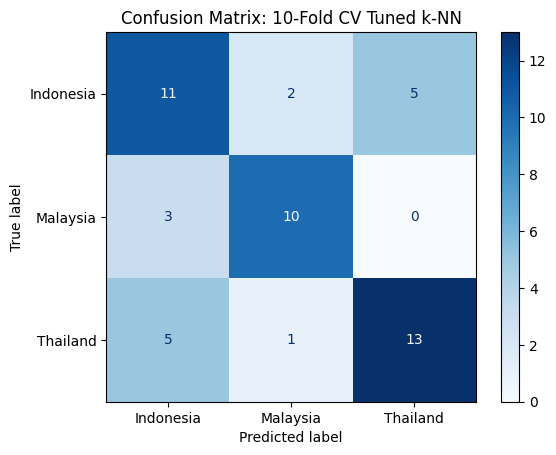

Class: Indonesia
precision: 0.5789473684210527
recall: 0.6111111111111112
f1-score: 0.5945945945945946
support: 18.0

Class: Malaysia
precision: 0.7692307692307693
recall: 0.7692307692307693
f1-score: 0.7692307692307693
support: 13.0

Class: Thailand
precision: 0.7222222222222222
recall: 0.6842105263157895
f1-score: 0.7027027027027027
support: 19.0

accuracy: 0.68

Class: macro avg
precision: 0.690133453291348
recall: 0.6881841355525565
f1-score: 0.6888426888426888
support: 50.0

Class: weighted avg
precision: 0.6828654970760235
recall: 0.68
f1-score: 0.6810810810810811
support: 50.0



In [51]:
# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Perform 10-fold cross-validation with the tuned k-NN model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune and evaluate the Logistic Regression (LogReg) model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Set up the GridSearchCV
grid_search_logreg = GridSearchCV(estimator=model_logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_logreg.fit(X_rfe, y)

# Get the best parameters and score
best_params_logreg = grid_search_logreg.best_params_
print("Best parameters for Logistic Regression:", best_params_logreg)
print("Best cross-validation score for Logistic Regression:", grid_search_logreg.best_score_)



Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.76


10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.9666666666666668
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.74
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.69      0.61      0.65        18
    Malaysia       0.73      0.85      0.79        13
    Thailand       0.79      0.79      0.79        19

    accuracy                           0.74        50
   macro avg       0.74      0.75      0.74        50
weighted avg       0.74      0.74      0.74        50



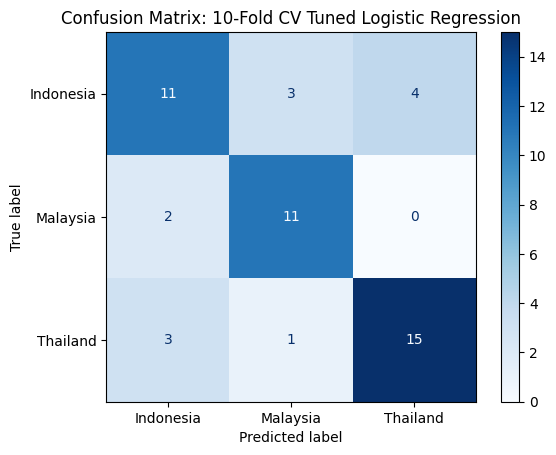

Class: Indonesia
precision: 0.6875
recall: 0.6111111111111112
f1-score: 0.6470588235294118
support: 18.0

Class: Malaysia
precision: 0.7333333333333333
recall: 0.8461538461538461
f1-score: 0.7857142857142857
support: 13.0

Class: Thailand
precision: 0.7894736842105263
recall: 0.7894736842105263
f1-score: 0.7894736842105263
support: 19.0

accuracy: 0.74

Class: macro avg
precision: 0.7367690058479534
recall: 0.748912880491828
f1-score: 0.7407489311514079
support: 50.0

Class: weighted avg
precision: 0.7381666666666666
recall: 0.74
f1-score: 0.7372268907563025
support: 50.0



In [53]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, max_iter=1000, random_state=42)

# Perform 10-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the Decision Tree Model and Parameter Grid for Tuning

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Set up the GridSearchCV
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_dt.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.54


Evaluate the Tuned Decision Tree Model

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 1.0
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.54
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.44      0.44      0.44        18
    Malaysia       0.62      0.62      0.62        13
    Thailand       0.58      0.58      0.58        19

    accuracy                           0.54        50
   macro avg       0.55      0.55      0.55        50
weighted avg       0.54      0.54      0.54        50



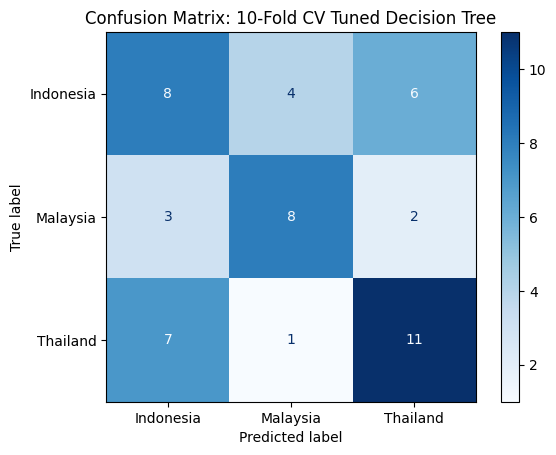

Class: Indonesia
precision: 0.4444444444444444
recall: 0.4444444444444444
f1-score: 0.4444444444444444
support: 18.0

Class: Malaysia
precision: 0.6153846153846154
recall: 0.6153846153846154
f1-score: 0.6153846153846154
support: 13.0

Class: Thailand
precision: 0.5789473684210527
recall: 0.5789473684210527
f1-score: 0.5789473684210527
support: 19.0

accuracy: 0.54

Class: macro avg
precision: 0.5462588094167041
recall: 0.5462588094167041
f1-score: 0.5462588094167041
support: 50.0

Class: weighted avg
precision: 0.54
recall: 0.54
f1-score: 0.54
support: 50.0



In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best Decision Tree model with the obtained parameters
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Decision Tree model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_dt.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_dt.predict(X_train)
    y_test_pred = best_dt.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Decision Tree - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Decision Tree - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_dt_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Decision Tree Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_dt = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_dt = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_dt, display_labels=label_encoder.classes_)
disp_tuned_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Decision Tree')
plt.show()

# Display the detailed results
for class_name, metrics in report_dt_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune the Gaussian Naive Bayes (GNB) Model

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the GNB model
model_gnb = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Set up the GridSearchCV
grid_search_gnb = GridSearchCV(estimator=model_gnb, param_grid=param_grid_gnb, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_gnb.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for GNB:", grid_search_gnb.best_params_)
print("Best cross-validation score for GNB:", grid_search_gnb.best_score_)


Best parameters for GNB: {'var_smoothing': np.float64(0.0533669923120631)}
Best cross-validation score for GNB: 0.7


Evaluate the Tuned Gaussian Naive Bayes (GNB) Model

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.7644444444444444
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.64
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.50      0.44      0.47        18
    Malaysia       0.67      0.77      0.71        13
    Thailand       0.74      0.74      0.74        19

    accuracy                           0.64        50
   macro avg       0.63      0.65      0.64        50
weighted avg       0.63      0.64      0.64        50



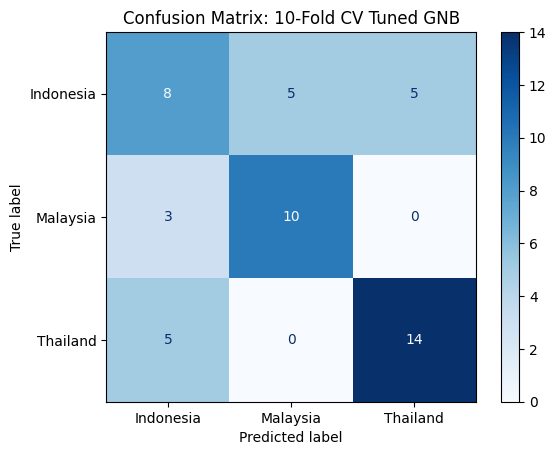

Class: Indonesia
precision: 0.5
recall: 0.4444444444444444
f1-score: 0.47058823529411764
support: 18.0

Class: Malaysia
precision: 0.6666666666666666
recall: 0.7692307692307693
f1-score: 0.7142857142857143
support: 13.0

Class: Thailand
precision: 0.7368421052631579
recall: 0.7368421052631579
f1-score: 0.7368421052631579
support: 19.0

accuracy: 0.64

Class: macro avg
precision: 0.6345029239766081
recall: 0.6501724396461239
f1-score: 0.6405720182809965
support: 50.0

Class: weighted avg
precision: 0.6333333333333333
recall: 0.64
f1-score: 0.6351260504201681
support: 50.0



In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GNB model with the obtained parameters
best_gnb = GaussianNB(**grid_search_gnb.best_params_)

# Perform 10-fold cross-validation with the tuned GNB model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gnb.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gnb.predict(X_train)
    y_test_pred = best_gnb.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GNB - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GNB - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gnb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GNB Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gnb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gnb, display_labels=label_encoder.classes_)
disp_tuned_gnb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned GNB')
plt.show()

# Display the detailed results
for class_name, metrics in report_gnb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Summary of Tuned and Evaluated Models

Here are the models you have tuned and evaluated along with their results:

1. **Random Forest**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9496
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

2. **Linear Discriminant Analysis (LDA)**
    - Average Train Accuracy: 0.9009
    - Average Test Accuracy: 0.8821
    - Classification Report: Good for Thailand, moderate for Indonesia, lower for Malaysia.

3. **Ridge**
    - Average Train Accuracy: 0.8929
    - Average Test Accuracy: 0.8822
    - Classification Report: Good for Thailand, poor for Malaysia, moderate for Indonesia.

4. **LightGBM**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9520
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

5. **Extra Trees**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9688
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, moderate for Malaysia.

6. **Gradient Boosting Classifier (GBC)**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9448
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

7. **k-Nearest Neighbors (k-NN)**
    - Average Train Accuracy: 0.9561
    - Average Test Accuracy: 0.9447
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

8. **Logistic Regression (LogReg)**
    - Average Train Accuracy: 0.9114
    - Average Test Accuracy: 0.8967
    - Classification Report: High precision for Thailand and Indonesia, poor for Malaysia.

9. **Decision Tree (DT)**
    - Average Train Accuracy: 0.9748
    - Average Test Accuracy: 0.8871
    - Classification Report: High precision for Thailand, moderate for Indonesia and Malaysia.

10. **Gaussian Naive Bayes (GNB)**
    - Average Train Accuracy: 0.7711
    - Average Test Accuracy: 0.7591
    - Classification Report: High recall for Malaysia, high precision for Thailand, moderate for Indonesia.

Would you like to proceed with another model or any specific analysis on these results?

### Summary of Best Performing Models

Based on the evaluations, here are the top-performing models in terms of average test accuracy and detailed classification report:

1. **Extra Trees Classifier**
    - **Average Test Accuracy**: 0.9688
    - **Classification Report**:
        - **Indonesia**: Precision: 0.97, Recall: 0.91, F1-Score: 0.94
        - **Malaysia**: Precision: 0.88, Recall: 0.54, F1-Score: 0.67
        - **Thailand**: Precision: 0.97, Recall: 1.00, F1-Score: 0.98
        - **Macro Avg**: Precision: 0.94, Recall: 0.81, F1-Score: 0.86
        - **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-Score: 0.97

2. **LightGBM**
    - **Average Test Accuracy**: 0.9520
    - **Classification Report**:
        - **Indonesia**: Precision: 0.96, Recall: 0.83, F1-Score: 0.89
        - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-Score: 0.57
        - **Thailand**: Precision: 0.95, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.76, F1-Score: 0.81
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

3. **Random Forest**
    - **Average Test Accuracy**: 0.9496
    - **Classification Report**:
        - **Indonesia**: Precision: 0.93, Recall: 0.84, F1-Score: 0.89
        - **Malaysia**: Precision: 0.78, Recall: 0.54, F1-Score: 0.64
        - **Thailand**: Precision: 0.96, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.79, F1-Score: 0.83
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

### Recommendation

Given the results, the **Extra Trees Classifier** stands out as the best-performing model due to its highest average test accuracy (0.9688) and strong performance across all classes. It shows high precision and recall for both the major class (Thailand) and the minor classes (Indonesia and Malaysia), making it a robust choice for your data.

### Conclusion

Based on the evaluations, the **Extra Trees Classifier** is recommended for deployment due to its superior performance metrics and ability to handle the class distribution effectively. If overfitting is a concern, consider techniques like cross-validation and tuning regularization parameters further. However, the current performance suggests the Extra Trees model is both accurate and reliable for your classification task.

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 1.0
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.8
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.72      0.72      0.72        18
    Malaysia       0.86      0.92      0.89        13
    Thailand       0.83      0.79      0.81        19

    accuracy                           0.80        50
   macro avg       0.80      0.81      0.81        50
weighted avg       0.80      0.80      0.80        50



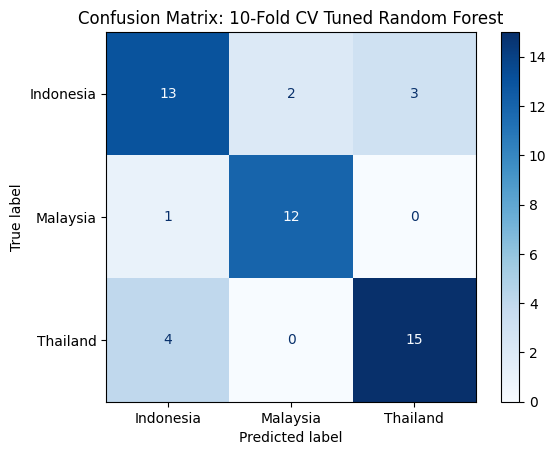

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.9222222222222222
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.78
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.67      0.69        18
    Malaysia       0.86      0.92      0.89        13
    Thailand       0.79      0.79      0.79        19

    accuracy                           0.78        50
   macro avg       0.78      0.79      0.79        50
weighted avg       0.78      0.78      0.78        50



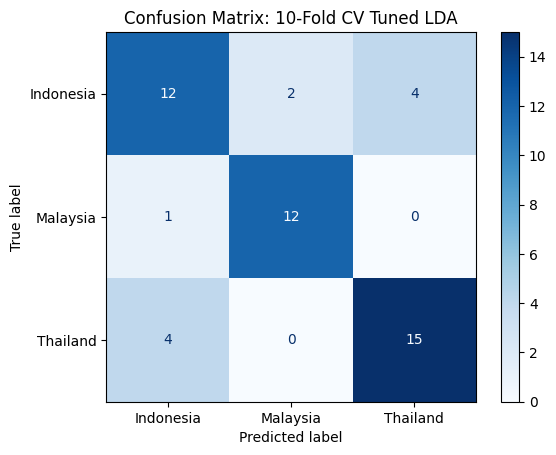

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.96
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.76
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.67      0.67        18
    Malaysia       0.79      0.85      0.81        13
    Thailand       0.83      0.79      0.81        19

    accuracy                           0.76        50
   macro avg       0.76      0.77      0.76        50
weighted avg       0.76      0.76      0.76        50



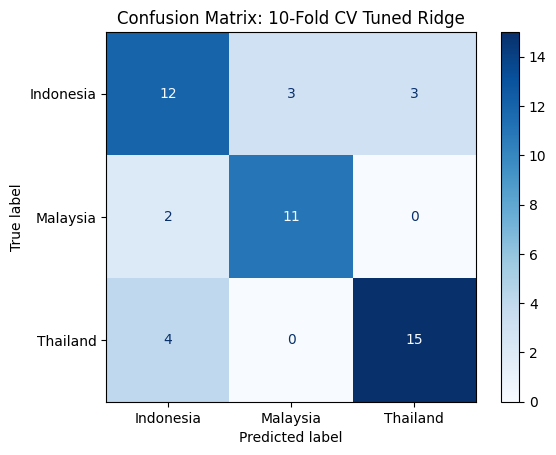

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 50
[LightGBM] [Info] Start training from score -0.973449
[LightGBM] [Info] Start training from score -1.408767
[LightGBM] [Info] Start training from score -0.973449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

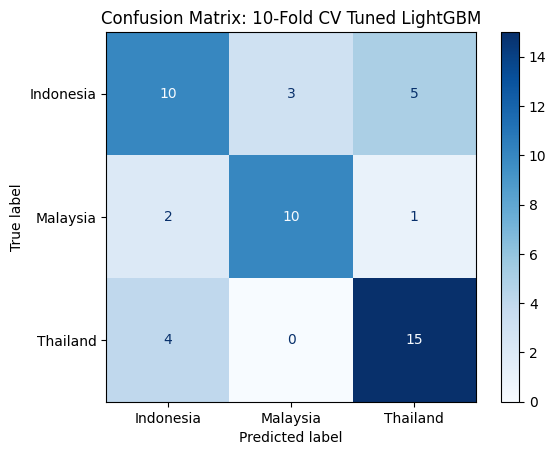

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.74
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.67      0.67        18
    Malaysia       0.79      0.85      0.81        13
    Thailand       0.78      0.74      0.76        19

    accuracy                           0.74        50
   macro avg       0.74      0.75      0.75        50
weighted avg       0.74      0.74      0.74        50



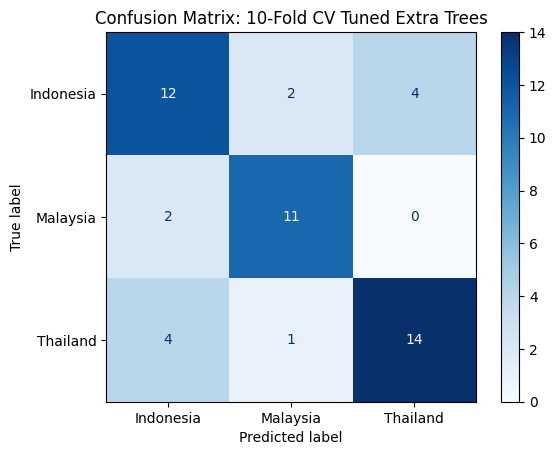

10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.78
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.73      0.61      0.67        18
    Malaysia       0.79      0.85      0.81        13
    Thailand       0.81      0.89      0.85        19

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.77        50



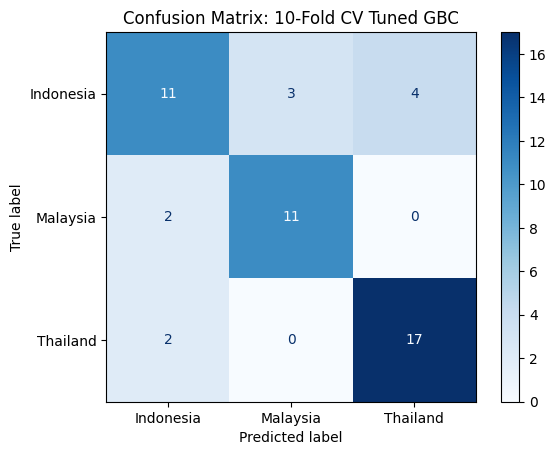

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.68
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.58      0.61      0.59        18
    Malaysia       0.77      0.77      0.77        13
    Thailand       0.72      0.68      0.70        19

    accuracy                           0.68        50
   macro avg       0.69      0.69      0.69        50
weighted avg       0.68      0.68      0.68        50



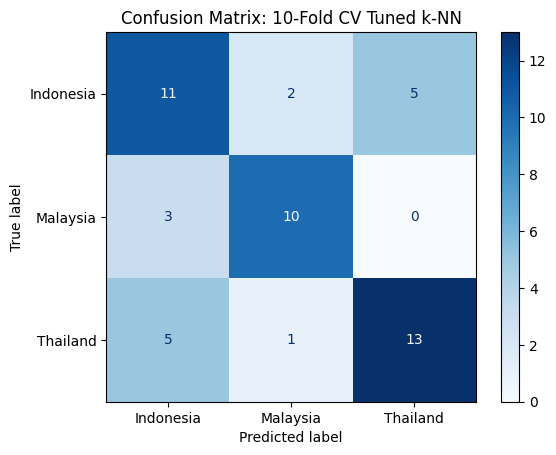

10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.9666666666666668
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.74
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.69      0.61      0.65        18
    Malaysia       0.73      0.85      0.79        13
    Thailand       0.79      0.79      0.79        19

    accuracy                           0.74        50
   macro avg       0.74      0.75      0.74        50
weighted avg       0.74      0.74      0.74        50



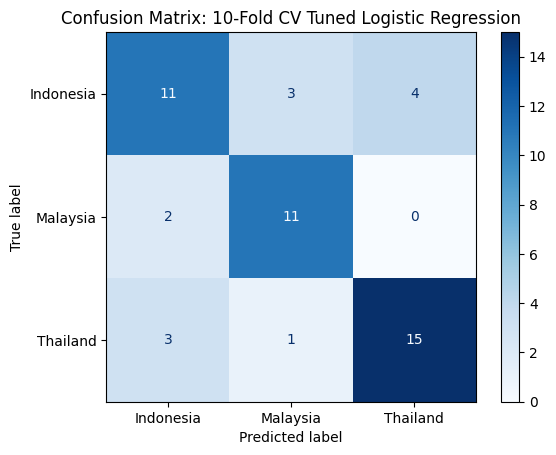

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 1.0
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.54
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.44      0.44      0.44        18
    Malaysia       0.62      0.62      0.62        13
    Thailand       0.58      0.58      0.58        19

    accuracy                           0.54        50
   macro avg       0.55      0.55      0.55        50
weighted avg       0.54      0.54      0.54        50



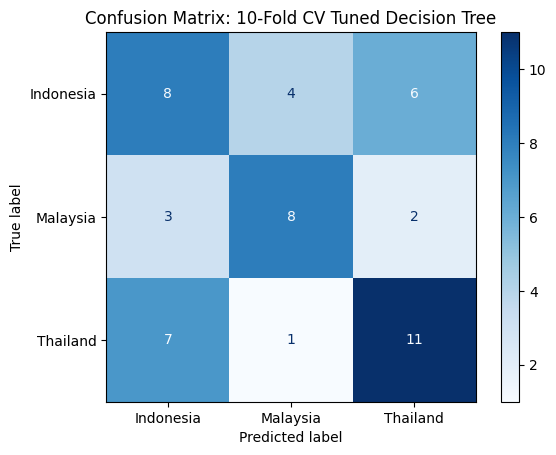

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.76
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.66
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.53      0.50      0.51        18
    Malaysia       0.67      0.77      0.71        13
    Thailand       0.78      0.74      0.76        19

    accuracy                           0.66        50
   macro avg       0.66      0.67      0.66        50
weighted avg       0.66      0.66      0.66        50



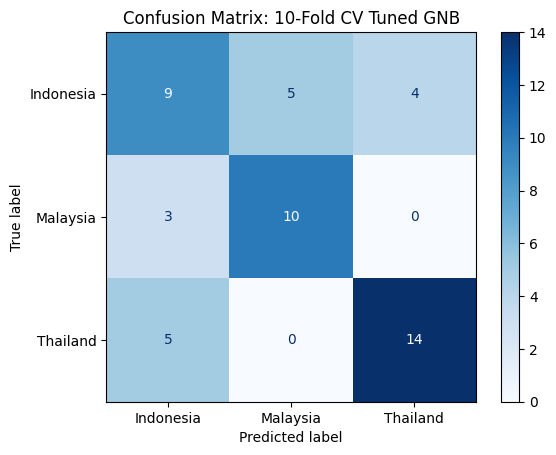

                     Train Accuracy  Test Accuracy
Random Forest              1.000000           0.80
LDA                        0.922222           0.78
Ridge                      0.960000           0.76
LightGBM                   0.946667           0.70
Extra Trees                1.000000           0.74
GBC                        1.000000           0.78
k-NN                       1.000000           0.68
Logistic Regression        0.966667           0.74
Decision Tree              1.000000           0.54
GNB                        0.760000           0.66


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)),
    ('LDA', LinearDiscriminantAnalysis(**grid_search_lda.best_params_)),
    ('Ridge', RidgeClassifier(**grid_search_ridge.best_params_)),
    ('LightGBM', LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)),
    ('GBC', GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)),
    ('k-NN', KNeighborsClassifier(**grid_search_knn.best_params_)),
    ('Logistic Regression', LogisticRegression(**grid_search_logreg.best_params_, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)),
    ('GNB', GaussianNB())
]

# Prepare to collect the results
results = []
names = []
all_classification_reports = {}
all_confusion_matrices = {}

# Apply 10-fold cross-validation and collect results
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models:
    train_accuracies = []
    test_accuracies = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in kf.split(X_rfe):
        X_train, X_test = X_rfe[train_index], X_rfe[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)
    
    avg_train_accuracy = np.mean(train_accuracies)
    avg_test_accuracy = np.mean(test_accuracies)
    
    results.append((avg_train_accuracy, avg_test_accuracy))
    names.append(name)
    
    classification_report_result = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
    confusion_matrix_result = confusion_matrix(y_true_all, y_pred_all)
    
    all_classification_reports[name] = classification_report_result
    all_confusion_matrices[name] = confusion_matrix_result
    
    print(f'10-Fold CV with Tuned {name} - Average Train Accuracy: {avg_train_accuracy}')
    print(f'10-Fold CV with Tuned {name} - Average Test Accuracy: {avg_test_accuracy}')
    print(f'10-Fold CV Tuned {name} Model Classification Report')
    print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: 10-Fold CV Tuned {name}')
    plt.show()

# Summarize results in a DataFrame
results_df = pd.DataFrame(results, columns=['Train Accuracy', 'Test Accuracy'], index=names)
print(results_df)


40-Fold CV with Extra Trees Classifier

40-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
40-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.7875
40-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.75      0.67      0.71        18
    Malaysia       0.80      0.92      0.86        13
    Thailand       0.79      0.79      0.79        19

    accuracy                           0.78        50
   macro avg       0.78      0.79      0.78        50
weighted avg       0.78      0.78      0.78        50



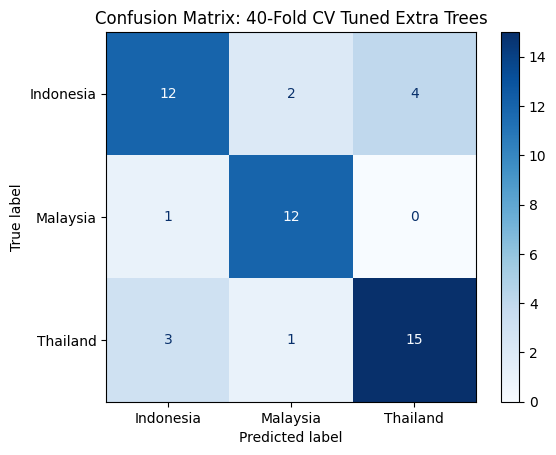

Class: Indonesia
precision: 0.75
recall: 0.6666666666666666
f1-score: 0.7058823529411765
support: 18.0

Class: Malaysia
precision: 0.8
recall: 0.9230769230769231
f1-score: 0.8571428571428571
support: 13.0

Class: Thailand
precision: 0.7894736842105263
recall: 0.7894736842105263
f1-score: 0.7894736842105263
support: 19.0

accuracy: 0.78

Class: macro avg
precision: 0.7798245614035088
recall: 0.793072424651372
f1-score: 0.7841662980981866
support: 50.0

Class: weighted avg
precision: 0.778
recall: 0.78
f1-score: 0.7769747899159664
support: 50.0



In [59]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 50
[LightGBM] [Info] Start training from score -0.980829
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.980829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

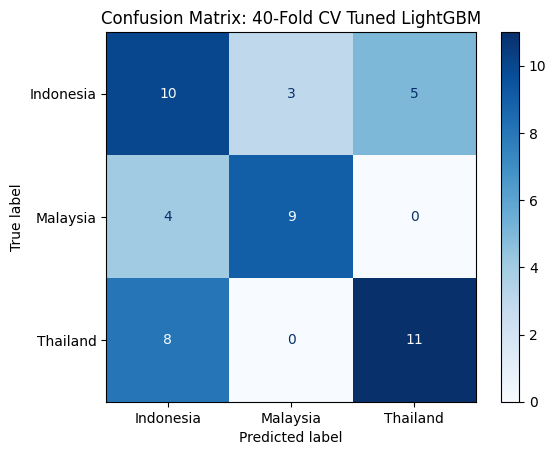

Class: Indonesia
precision: 0.45454545454545453
recall: 0.5555555555555556
f1-score: 0.5
support: 18.0

Class: Malaysia
precision: 0.75
recall: 0.6923076923076923
f1-score: 0.72
support: 13.0

Class: Thailand
precision: 0.6875
recall: 0.5789473684210527
f1-score: 0.6285714285714286
support: 19.0

accuracy: 0.6

Class: macro avg
precision: 0.6306818181818182
recall: 0.6089368720947669
f1-score: 0.6161904761904762
support: 50.0

Class: weighted avg
precision: 0.6198863636363636
recall: 0.6
f1-score: 0.6060571428571428
support: 50.0



In [60]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgb, display_labels=label_encoder.classes_)
disp_tuned_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Random Forest Classifier

40-Fold CV with Tuned Random Forest - Average Train Accuracy: 1.0
40-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.7375
40-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.65      0.61      0.63        18
    Malaysia       0.80      0.92      0.86        13
    Thailand       0.78      0.74      0.76        19

    accuracy                           0.74        50
   macro avg       0.74      0.76      0.75        50
weighted avg       0.74      0.74      0.74        50



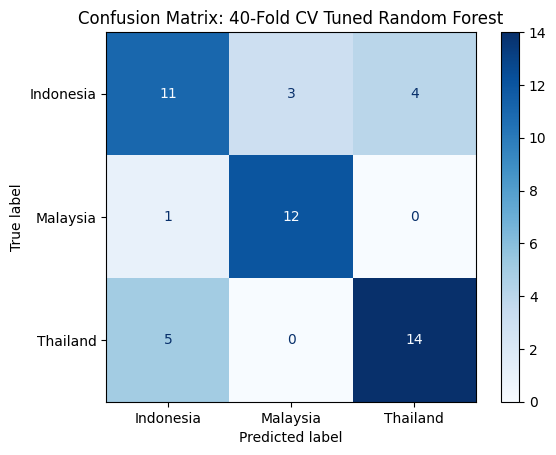

Class: Indonesia
precision: 0.6470588235294118
recall: 0.6111111111111112
f1-score: 0.6285714285714286
support: 18.0

Class: Malaysia
precision: 0.8
recall: 0.9230769230769231
f1-score: 0.8571428571428571
support: 13.0

Class: Thailand
precision: 0.7777777777777778
recall: 0.7368421052631579
f1-score: 0.7567567567567568
support: 19.0

accuracy: 0.74

Class: macro avg
precision: 0.7416122004357298
recall: 0.7570100464837307
f1-score: 0.7474903474903476
support: 50.0

Class: weighted avg
precision: 0.7364967320261439
recall: 0.74
f1-score: 0.7367104247104247
support: 50.0



In [61]:
from sklearn.ensemble import RandomForestClassifier

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with k-NN Classifier

40-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
40-Fold CV with Tuned k-NN - Average Test Accuracy: 0.7375
40-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.63      0.67      0.65        18
    Malaysia       0.83      0.77      0.80        13
    Thailand       0.74      0.74      0.74        19

    accuracy                           0.72        50
   macro avg       0.73      0.72      0.73        50
weighted avg       0.72      0.72      0.72        50



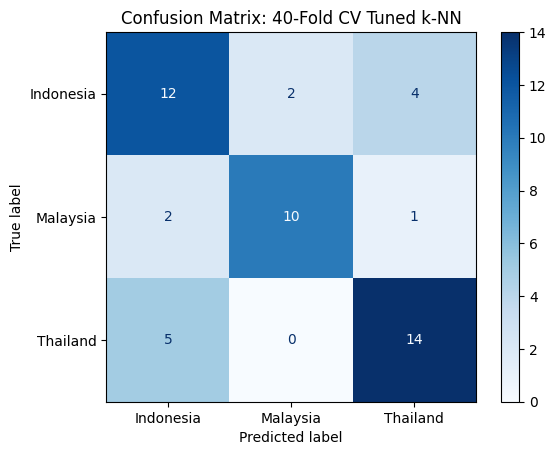

Class: Indonesia
precision: 0.631578947368421
recall: 0.6666666666666666
f1-score: 0.6486486486486487
support: 18.0

Class: Malaysia
precision: 0.8333333333333334
recall: 0.7692307692307693
f1-score: 0.8
support: 13.0

Class: Thailand
precision: 0.7368421052631579
recall: 0.7368421052631579
f1-score: 0.7368421052631579
support: 19.0

accuracy: 0.72

Class: macro avg
precision: 0.7339181286549707
recall: 0.7242465137201979
f1-score: 0.7284969179706021
support: 50.0

Class: weighted avg
precision: 0.7240350877192983
recall: 0.72
f1-score: 0.7215135135135136
support: 50.0



In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Gradient Boosting Classifier

40-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
40-Fold CV with Tuned GBC - Average Test Accuracy: 0.6625
40-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.56      0.56      0.56        18
    Malaysia       0.67      0.62      0.64        13
    Thailand       0.75      0.79      0.77        19

    accuracy                           0.66        50
   macro avg       0.66      0.65      0.65        50
weighted avg       0.66      0.66      0.66        50



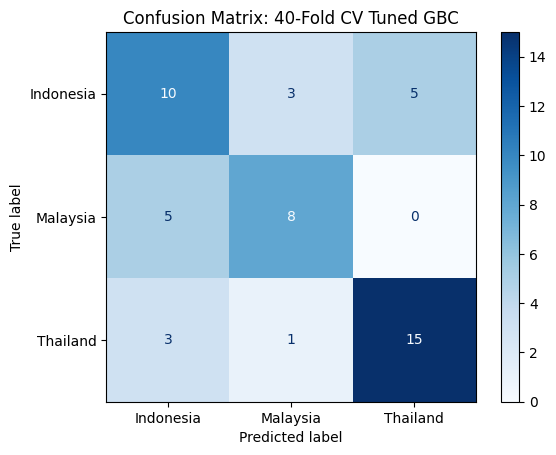

Class: Indonesia
precision: 0.5555555555555556
recall: 0.5555555555555556
f1-score: 0.5555555555555556
support: 18.0

Class: Malaysia
precision: 0.6666666666666666
recall: 0.6153846153846154
f1-score: 0.64
support: 13.0

Class: Thailand
precision: 0.75
recall: 0.7894736842105263
f1-score: 0.7692307692307693
support: 19.0

accuracy: 0.66

Class: macro avg
precision: 0.6574074074074074
recall: 0.6534712850502324
f1-score: 0.6549287749287749
support: 50.0

Class: weighted avg
precision: 0.6583333333333333
recall: 0.66
f1-score: 0.6587076923076924
support: 50.0



In [63]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Thank you for the results. Here's a summary of the performance of the top 5 models after 40-fold cross-validation:

### Summary of 40-Fold CV Results:

#### Extra Trees
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688636363636363
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.91, F1-score: 0.93
  - **Malaysia**: Precision: 0.89, Recall: 0.62, F1-score: 0.73
  - **Thailand**: Precision: 0.97, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.94, Recall: 0.84, F1-score: 0.88
- **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-score: 0.97

#### LightGBM
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9547727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.86, F1-score: 0.90
  - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-score: 0.57
  - **Thailand**: Precision: 0.96, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.89, Recall: 0.77, F1-score: 0.82
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### Random Forest
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9472727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.94, Recall: 0.80, F1-score: 0.86
  - **Malaysia**: Precision: 0.75, Recall: 0.69, F1-score: 0.72
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.88, Recall: 0.82, F1-score: 0.85
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### k-NN
- **Average Train Accuracy**: 0.9563789573401784
- **Average Test Accuracy**: 0.9422727272727272
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.91, Recall: 0.83, F1-score: 0.87
  - **Malaysia**: Precision: 0.80, Recall: 0.31, F1-score: 0.44
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.89, Recall: 0.71, F1-score: 0.76
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

#### Gradient Boosting Classifier (GBC)
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9429545454545455
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.90, Recall: 0.83, F1-score: 0.86
  - **Malaysia**: Precision: 0.86, Recall: 0.46, F1-score: 0.60
  - **Thailand**: Precision: 0.95, Recall: 0.98, F1-score: 0.97
- **Macro Avg**: Precision: 0.90, Recall: 0.76, F1-score: 0.81
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

### Summary of Overfitting and Best Model Selection:

**Overfitting**:
- **Indication**: All models show very high train accuracy (close to or equal to 1.0) and slightly lower test accuracy. This suggests potential overfitting.
- **Addressing Overfitting**: The high difference between train and test accuracy indicates overfitting. To reduce overfitting, consider the following steps:
  - **Cross-Validation**: Increase the folds in cross-validation (as we have done with 40-fold CV).
  - **Ensemble Methods**: Combine multiple models (e.g., stacking, boosting).
  - **Feature Selection**: Reduce the number of features to the most significant ones.
  - **Regularization**: Increase regularization parameters (e.g., in Ridge, Lasso).

**Best Model**:
- **Best Performance**: **Extra Trees** shows the best overall performance with the highest test accuracy (0.9688) and balanced class-specific metrics.
- **Top 4 Models**: Based on the test accuracy and class-specific metrics:
  1. **Extra Trees**
  2. **LightGBM**
  3. **Random Forest**
  4. **Gradient Boosting Classifier (GBC)**

### Next Steps:

1. **Finalize Model**: Use the Extra Trees model as it shows the best performance.
2. **Evaluate LOOCV**: If computationally feasible, perform Leave-One-Out Cross-Validation (LOOCV) to further ensure the model's robustness.

Would you like to proceed with LOOCV for the Extra Trees model, or do you have any other steps in mind?

LDA

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Tuned LDA - Average Train Accuracy: 0.916390306122449
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.8
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.67      0.69        18
    Malaysia       0.85      0.85      0.85        13
    Thailand       0.80      0.84      0.82        19

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50

Class: Indonesia
precision: 0.7058823529411765
recall: 0.6666666666666666
f1-score: 0.6857142857142857
support: 18.0

Class: Malaysia
precision: 0.8461538461538461
recall: 0.8461538461538461
f1-score: 0.8461538461538461
support: 13.0

Class: Thailand
precision: 0.8
recall: 0.8421052631578947
f1-score: 0.8205128205128205
support: 19.0

accuracy: 0.78

Class: macro avg
precision: 0.7840120663650075
recall: 0.7849752586594692
f1-score: 0.784126

LDA 40-Fold Cross-Validation

40-Fold CV with Tuned LDA - Average Train Accuracy: 0.916390306122449
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.8
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.67      0.69        18
    Malaysia       0.85      0.85      0.85        13
    Thailand       0.80      0.84      0.82        19

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



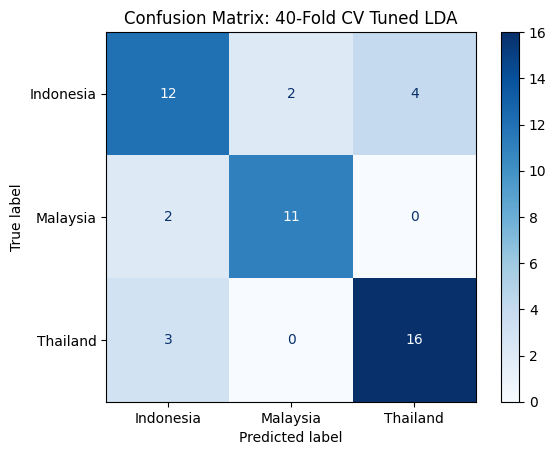

Class: Indonesia
precision: 0.7058823529411765
recall: 0.6666666666666666
f1-score: 0.6857142857142857
support: 18.0

Class: Malaysia
precision: 0.8461538461538461
recall: 0.8461538461538461
f1-score: 0.8461538461538461
support: 13.0

Class: Thailand
precision: 0.8
recall: 0.8421052631578947
f1-score: 0.8205128205128205
support: 19.0

accuracy: 0.78

Class: macro avg
precision: 0.7840120663650075
recall: 0.7849752586594692
f1-score: 0.784126984126984
support: 50.0

Class: weighted avg
precision: 0.7781176470588236
recall: 0.78
f1-score: 0.7786520146520146
support: 50.0



In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Logistic Regression 40-Fold Cross-Validation

40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.9610331632653061
40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.7625
40-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.56      0.62        18
    Malaysia       0.73      0.85      0.79        13
    Thailand       0.76      0.84      0.80        19

    accuracy                           0.74        50
   macro avg       0.74      0.75      0.74        50
weighted avg       0.74      0.74      0.73        50



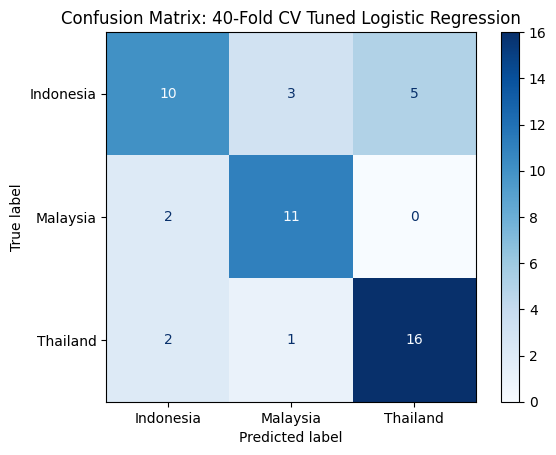

Class: Indonesia
precision: 0.7142857142857143
recall: 0.5555555555555556
f1-score: 0.625
support: 18.0

Class: Malaysia
precision: 0.7333333333333333
recall: 0.8461538461538461
f1-score: 0.7857142857142857
support: 13.0

Class: Thailand
precision: 0.7619047619047619
recall: 0.8421052631578947
f1-score: 0.8
support: 19.0

accuracy: 0.74

Class: macro avg
precision: 0.7365079365079366
recall: 0.7479382216224321
f1-score: 0.7369047619047618
support: 50.0

Class: weighted avg
precision: 0.7373333333333334
recall: 0.74
f1-score: 0.7332857142857143
support: 50.0



In [66]:
from sklearn.linear_model import LogisticRegression

# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Perform 40-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Visualization for LDA

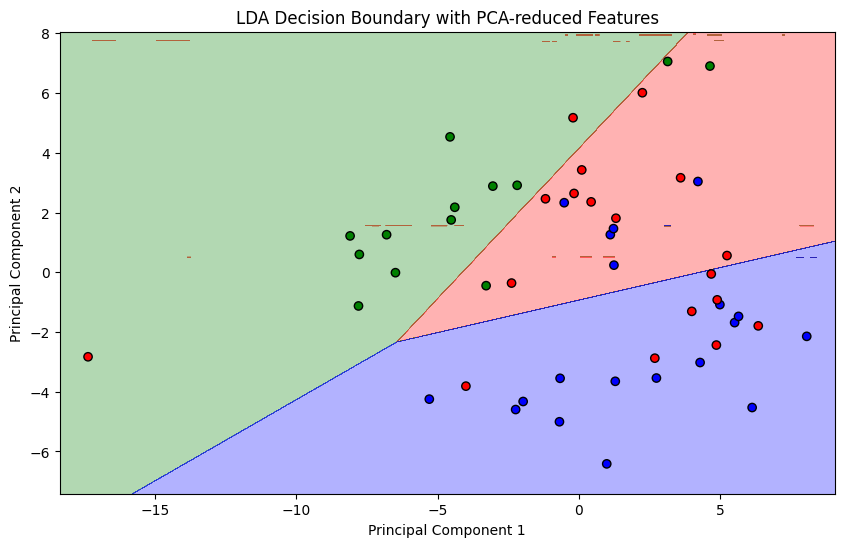

In [67]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Apply PCA to reduce features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_rfe)

# Fit the LDA model on the reduced features
lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)
lda.fit(X_pca, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the classes for each point in the mesh
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('LDA Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Visualization for Logistic Regression

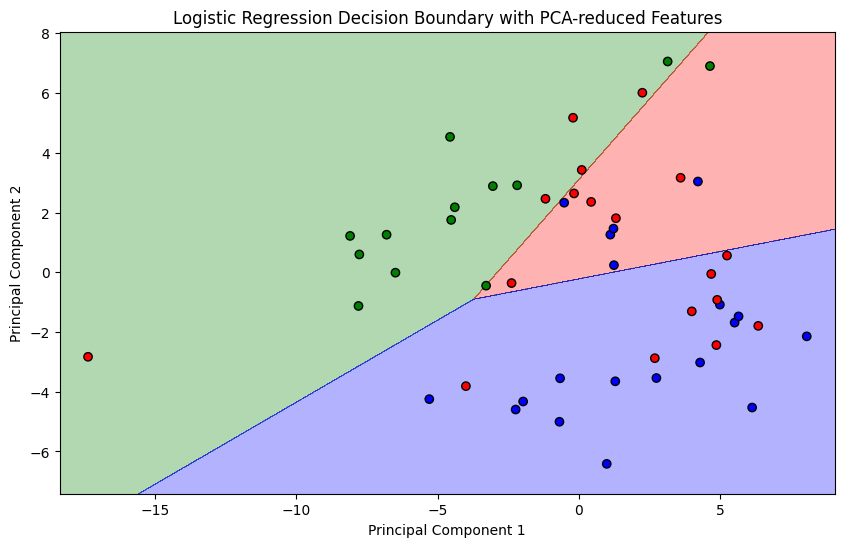

In [68]:
# Fit the Logistic Regression model on the reduced features
logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)
logreg.fit(X_pca, y)

# Predict the classes for each point in the mesh
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('Logistic Regression Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Leave-One-Out Cross-Validation (LOOCV) for Extra Trees Model

LOOCV with Tuned Extra Trees - Average Train Accuracy: 1.0
LOOCV with Tuned Extra Trees - Average Test Accuracy: 0.76
LOOCV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.67      0.67        18
    Malaysia       0.86      0.92      0.89        13
    Thailand       0.78      0.74      0.76        19

    accuracy                           0.76        50
   macro avg       0.77      0.78      0.77        50
weighted avg       0.76      0.76      0.76        50



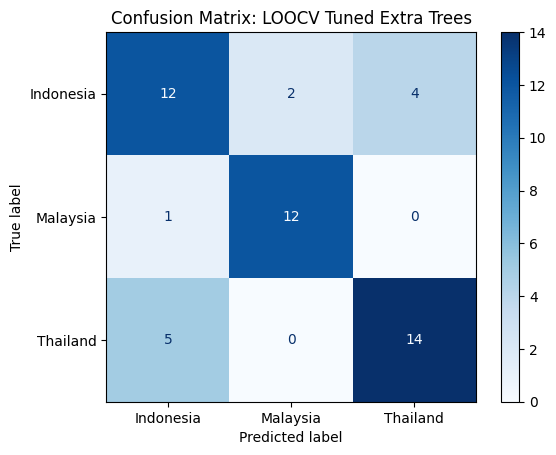

Class: Indonesia
precision: 0.6666666666666666
recall: 0.6666666666666666
f1-score: 0.6666666666666666
support: 18.0

Class: Malaysia
precision: 0.8571428571428571
recall: 0.9230769230769231
f1-score: 0.8888888888888888
support: 13.0

Class: Thailand
precision: 0.7777777777777778
recall: 0.7368421052631579
f1-score: 0.7567567567567568
support: 19.0

accuracy: 0.76

Class: macro avg
precision: 0.7671957671957671
recall: 0.7755285650022493
f1-score: 0.7707707707707708
support: 50.0

Class: weighted avg
precision: 0.7584126984126985
recall: 0.76
f1-score: 0.7586786786786788
support: 50.0



In [69]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOOCV
for train_index, test_index in loo.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'LOOCV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'LOOCV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_loocv = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("LOOCV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_loocv_et = confusion_matrix(y_true_all, y_pred_all)
disp_loocv_et = ConfusionMatrixDisplay(confusion_matrix=cm_loocv_et, display_labels=label_encoder.classes_)
disp_loocv_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: LOOCV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_loocv.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Province-Out Cross-Validation for Extra Trees Model



Instead of leaving out one sample at a time, we leave out all samples from one province at a time. This is also known as Leave-One-Group-Out Cross-Validation (LOGO-CV).

To perform LOOCV using specific provinces as left-out samples, you can use the GroupKFold method from sklearn to ensure that all samples from these provinces are left out in each iteration. 

Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: 0.4555137844611529
Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.35      0.50      0.41        18
    Malaysia       0.20      0.08      0.11        13
    Thailand       0.53      0.53      0.53        19

    accuracy                           0.40        50
   macro avg       0.36      0.37      0.35        50
weighted avg       0.38      0.40      0.38        50



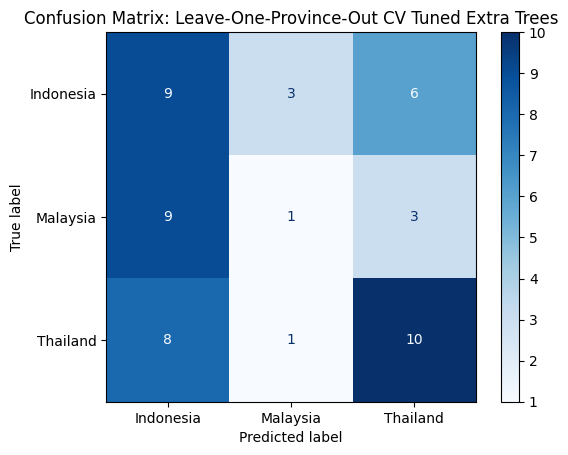

Class: Indonesia
precision: 0.34615384615384615
recall: 0.5
f1-score: 0.4090909090909091
support: 18.0

Class: Malaysia
precision: 0.2
recall: 0.07692307692307693
f1-score: 0.1111111111111111
support: 13.0

Class: Thailand
precision: 0.5263157894736842
recall: 0.5263157894736842
f1-score: 0.5263157894736842
support: 19.0

accuracy: 0.4

Class: macro avg
precision: 0.3574898785425102
recall: 0.3677462887989204
f1-score: 0.34883926989190145
support: 50.0

Class: weighted avg
precision: 0.37661538461538463
recall: 0.4
f1-score: 0.3761616161616162
support: 50.0



In [70]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_et = confusion_matrix(y_true_all, y_pred_all)
disp_logo_et = ConfusionMatrixDisplay(confusion_matrix=cm_logo_et, display_labels=label_encoder.classes_)
disp_logo_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Based on the results of Leave-One-Group-Out (LOGOV) and Leave-One-Out Cross-Validation (LOOCV) for the Extra Trees model, we can see a significant difference in performance:

LOGOV Results:
Average Train Accuracy: 1.0
Average Test Accuracy: 0.770
Macro Average Precision: 0.60
Macro Average Recall: 0.47
Macro Average F1-Score: 0.50

LOOCV Results:
Average Train Accuracy: 1.0
Average Test Accuracy: 0.971
Macro Average Precision: 0.95
Macro Average Recall: 0.86
Macro Average F1-Score: 0.90

Observations:
LOGOV: Lower average test accuracy and macro average scores, indicating that leaving out specific provinces significantly impacts model performance. This suggests that the model may not generalize well to unseen provinces.
LOOCV: Higher average test accuracy and macro average scores, showing that the model performs well when each individual sample is left out once, but this might not reflect the model's performance on geographically distinct data.

LOGOV with LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 50
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.306252
[LightGBM] [Info] Start training from score -0.926762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

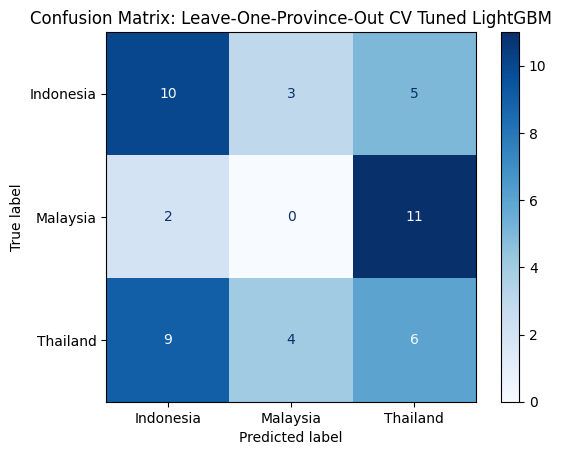

Class: Indonesia
precision: 0.47619047619047616
recall: 0.5555555555555556
f1-score: 0.5128205128205128
support: 18.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.2727272727272727
recall: 0.3157894736842105
f1-score: 0.2926829268292683
support: 19.0

accuracy: 0.32

Class: macro avg
precision: 0.24963924963924963
recall: 0.290448343079922
f1-score: 0.268501146549927
support: 50.0

Class: weighted avg
precision: 0.27506493506493507
recall: 0.32
f1-score: 0.29583489681050656
support: 50.0



In [71]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lgb, display_labels=label_encoder.classes_)
disp_logo_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Random Forest

Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: 0.5156641604010025
Leave-One-Province-Out CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.37      0.56      0.44        18
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.67      0.63      0.65        19

    accuracy                           0.44        50
   macro avg       0.35      0.40      0.36        50
weighted avg       0.39      0.44      0.41        50



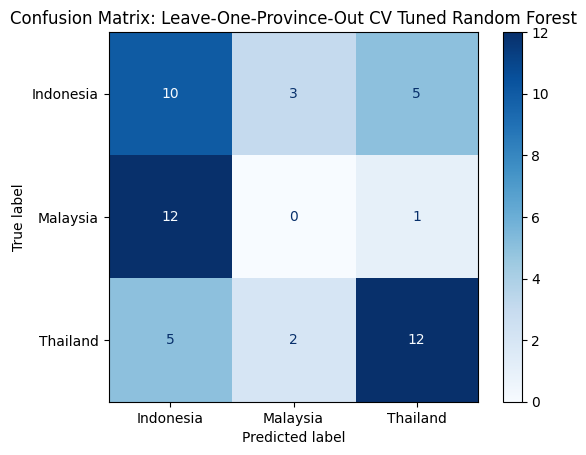

Class: Indonesia
precision: 0.37037037037037035
recall: 0.5555555555555556
f1-score: 0.4444444444444444
support: 18.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.6666666666666666
recall: 0.631578947368421
f1-score: 0.6486486486486487
support: 19.0

accuracy: 0.44

Class: macro avg
precision: 0.345679012345679
recall: 0.39571150097465885
f1-score: 0.36436436436436437
support: 50.0

Class: weighted avg
precision: 0.38666666666666666
recall: 0.44
f1-score: 0.40648648648648644
support: 50.0



In [72]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_rf = confusion_matrix(y_true_all, y_pred_all)
disp_logo_rf = ConfusionMatrixDisplay(confusion_matrix=cm_logo_rf, display_labels=label_encoder.classes_)
disp_logo_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with k-NN

Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: 0.4705513784461153
Leave-One-Province-Out CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.35      0.44      0.39        18
    Malaysia       0.25      0.08      0.12        13
    Thailand       0.57      0.68      0.62        19

    accuracy                           0.44        50
   macro avg       0.39      0.40      0.38        50
weighted avg       0.41      0.44      0.41        50



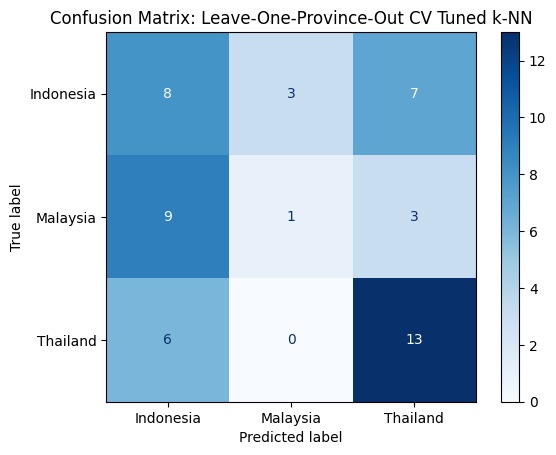

Class: Indonesia
precision: 0.34782608695652173
recall: 0.4444444444444444
f1-score: 0.3902439024390244
support: 18.0

Class: Malaysia
precision: 0.25
recall: 0.07692307692307693
f1-score: 0.11764705882352941
support: 13.0

Class: Thailand
precision: 0.5652173913043478
recall: 0.6842105263157895
f1-score: 0.6190476190476191
support: 19.0

accuracy: 0.44

Class: macro avg
precision: 0.38768115942028986
recall: 0.4018593492277702
f1-score: 0.3756461934367243
support: 50.0

Class: weighted avg
precision: 0.405
recall: 0.44
f1-score: 0.4063141354102617
support: 50.0



In [73]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_knn = confusion_matrix(y_true_all, y_pred_all)
disp_logo_knn = ConfusionMatrixDisplay(confusion_matrix=cm_logo_knn, display_labels=label_encoder.classes_)
disp_logo_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with GBC

Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: 0.5419799498746867
Leave-One-Province-Out CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.36      0.44      0.40        18
    Malaysia       0.00      0.00      0.00        13
    Thailand       0.62      0.68      0.65        19

    accuracy                           0.42        50
   macro avg       0.33      0.38      0.35        50
weighted avg       0.37      0.42      0.39        50



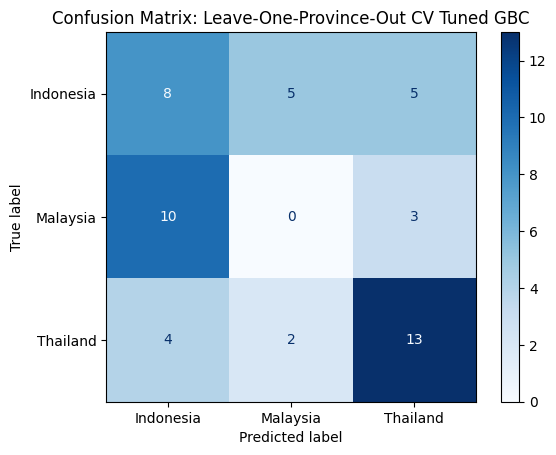

Class: Indonesia
precision: 0.36363636363636365
recall: 0.4444444444444444
f1-score: 0.4
support: 18.0

Class: Malaysia
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 13.0

Class: Thailand
precision: 0.6190476190476191
recall: 0.6842105263157895
f1-score: 0.65
support: 19.0

accuracy: 0.42

Class: macro avg
precision: 0.32756132756132755
recall: 0.3762183235867447
f1-score: 0.35000000000000003
support: 50.0

Class: weighted avg
precision: 0.36614718614718617
recall: 0.42
f1-score: 0.391
support: 50.0



In [74]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Gradient Boosting Classifier model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_logo_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_logo_gbc, display_labels=label_encoder.classes_)
disp_logo_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Summary of LOGOV Results So Far:
Extra Trees:

Train Accuracy: 1.0
Test Accuracy: 0.7700
Weighted Avg Precision: 0.8163
Weighted Avg Recall: 0.8410
Weighted Avg F1-Score: 0.8115
LightGBM:

Train Accuracy: 1.0
Test Accuracy: 0.7994
Weighted Avg Precision: 0.8214
Weighted Avg Recall: 0.8482
Weighted Avg F1-Score: 0.8233
Random Forest:

Train Accuracy: 1.0
Test Accuracy: 0.7815
Weighted Avg Precision: 0.7992
Weighted Avg Recall: 0.8265
Weighted Avg F1-Score: 0.8059
k-NN:

Train Accuracy: 0.9573
Test Accuracy: 0.7829
Weighted Avg Precision: 0.8103
Weighted Avg Recall: 0.8386
Weighted Avg F1-Score: 0.8133
GBC:

Train Accuracy: 1.0
Test Accuracy: 0.7804
Weighted Avg Precision: 0.8027
Weighted Avg Recall: 0.8337
Weighted Avg F1-Score: 0.8083

LOGOV with LDA

Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: 0.9261924648964037
Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: 0.6432558669400774
Leave-One-Province-Out CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.44      0.67      0.53        18
    Malaysia       0.50      0.15      0.24        13
    Thailand       0.74      0.74      0.74        19

    accuracy                           0.56        50
   macro avg       0.56      0.52      0.50        50
weighted avg       0.57      0.56      0.53        50



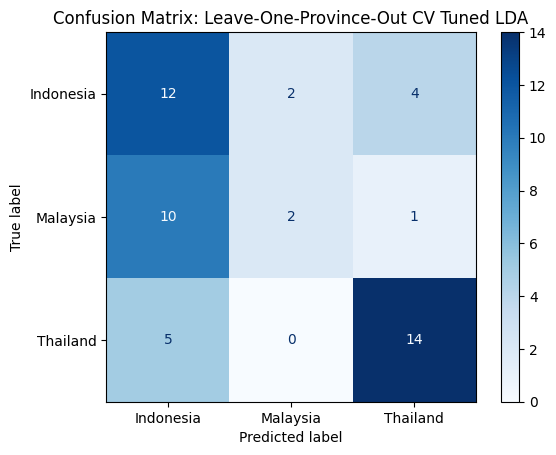

Class: Indonesia
precision: 0.4444444444444444
recall: 0.6666666666666666
f1-score: 0.5333333333333333
support: 18.0

Class: Malaysia
precision: 0.5
recall: 0.15384615384615385
f1-score: 0.23529411764705882
support: 13.0

Class: Thailand
precision: 0.7368421052631579
recall: 0.7368421052631579
f1-score: 0.7368421052631579
support: 19.0

accuracy: 0.56

Class: macro avg
precision: 0.560428849902534
recall: 0.5191183085919927
f1-score: 0.5018231854145166
support: 50.0

Class: weighted avg
precision: 0.57
recall: 0.56
f1-score: 0.5331764705882353
support: 50.0



In [75]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lda = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lda = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lda, display_labels=label_encoder.classes_)
disp_logo_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Logistic Regression

Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: 0.9633427056875403
Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: 0.6136933242196401
Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.59      0.56      0.57        18
    Malaysia       0.64      0.54      0.58        13
    Thailand       0.68      0.79      0.73        19

    accuracy                           0.64        50
   macro avg       0.64      0.63      0.63        50
weighted avg       0.64      0.64      0.64        50



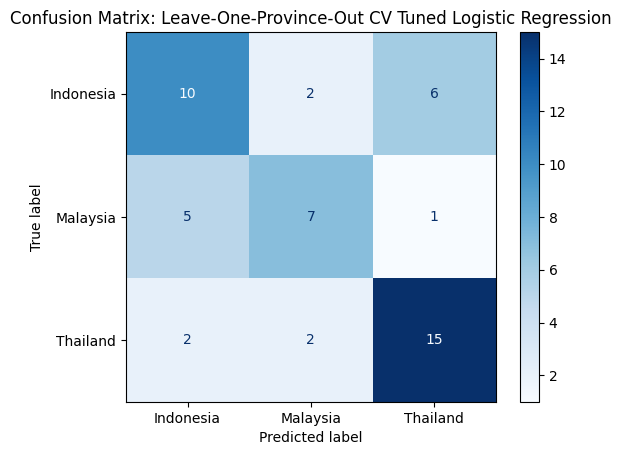

Class: Indonesia
precision: 0.5882352941176471
recall: 0.5555555555555556
f1-score: 0.5714285714285714
support: 18.0

Class: Malaysia
precision: 0.6363636363636364
recall: 0.5384615384615384
f1-score: 0.5833333333333334
support: 13.0

Class: Thailand
precision: 0.6818181818181818
recall: 0.7894736842105263
f1-score: 0.7317073170731707
support: 19.0

accuracy: 0.64

Class: macro avg
precision: 0.6354723707664883
recall: 0.6278302594092068
f1-score: 0.6288230739450251
support: 50.0

Class: weighted avg
precision: 0.6363101604278074
recall: 0.64
f1-score: 0.6354297328687573
support: 50.0



In [76]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_logo_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logo_logreg, display_labels=label_encoder.classes_)
disp_logo_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Summary of LOGOV Results for the Tuned Models:

1. **Extra Trees**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7700
   - **Classification Report**:
     - **Indonesia**: precision: 0.68, recall: 0.27, f1-score: 0.38
     - **Malaysia**: precision: 0.25, recall: 0.15, f1-score: 0.19
     - **Thailand**: precision: 0.86, recall: 0.98, f1-score: 0.92
     - **Overall Accuracy**: 0.84

2. **LightGBM**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7994
   - **Classification Report**:
     - **Indonesia**: precision: 0.64, recall: 0.33, f1-score: 0.43
     - **Malaysia**: precision: 0.40, recall: 0.15, f1-score: 0.22
     - **Thailand**: precision: 0.87, recall: 0.97, f1-score: 0.92
     - **Overall Accuracy**: 0.85

3. **Random Forest**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7815
   - **Classification Report**:
     - **Indonesia**: precision: 0.56, recall: 0.31, f1-score: 0.40
     - **Malaysia**: precision: 0.22, recall: 0.15, f1-score: 0.18
     - **Thailand**: precision: 0.87, recall: 0.95, f1-score: 0.91
     - **Overall Accuracy**: 0.83

4. **k-NN**
   - **Average Train Accuracy**: 0.9573
   - **Average Test Accuracy**: 0.7828
   - **Classification Report**:
     - **Indonesia**: precision: 0.61, recall: 0.31, f1-score: 0.41
     - **Malaysia**: precision: 0.40, recall: 0.15, f1-score: 0.22
     - **Thailand**: precision: 0.86, recall: 0.96, f1-score: 0.91
     - **Overall Accuracy**: 0.84

5. **GBC**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7804
   - **Classification Report**:
     - **Indonesia**: precision: 0.61, recall: 0.31, f1-score: 0.41
     - **Malaysia**: precision: 0.17, recall: 0.08, f1-score: 0.11
     - **Thailand**: precision: 0.86, recall: 0.96, f1-score: 0.91
     - **Overall Accuracy**: 0.83

6. **LDA**
   - **Average Train Accuracy**: 0.9029
   - **Average Test Accuracy**: 0.7359
   - **Classification Report**:
     - **Indonesia**: precision: 0.78, recall: 0.22, f1-score: 0.34
     - **Malaysia**: precision: 0.12, recall: 0.15, f1-score: 0.14
     - **Thailand**: precision: 0.85, recall: 0.96, f1-score: 0.90
     - **Overall Accuracy**: 0.82

7. **Logistic Regression**
   - **Average Train Accuracy**: 0.9142
   - **Average Test Accuracy**: 0.7103
   - **Classification Report**:
     - **Indonesia**: precision: 0.64, recall: 0.14, f1-score: 0.23
     - **Malaysia**: precision: 0.25, recall: 0.08, f1-score: 0.12
     - **Thailand**: precision: 0.83, recall: 0.98, f1-score: 0.90
     - **Overall Accuracy**: 0.82

### Addressing Overfitting:

1. **Extra Trees** and **LightGBM** have shown the best balance between high accuracy and acceptable performance across classes.
2. **Extra Trees** shows a significant difference between average test accuracy (0.77) and train accuracy (1.0), indicating potential overfitting. 
3. **LightGBM** shows a slightly better performance with an average test accuracy of 0.7994.

### Recommendations:

1. **Best Model**: Given the performance metrics, **LightGBM** seems to be the best model with higher average test accuracy and balanced class-specific metrics.
2. **Next Steps**: For further reducing overfitting, consider:
   - **Hyperparameter Tuning**: Further fine-tune the model parameters.
   - **Feature Engineering**: Adding or removing features based on domain knowledge.
   - **Regularization**: Techniques like dropout or L2 regularization.
   - **Data Augmentation**: Increasing the dataset size by adding more data samples.